# Исследование о продажах игр

В нашем распоряжении доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 
Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

### Откроем файл с данными и изучим общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

In [2]:
pd.set_option('chained_assignment', None)

In [3]:
data = pd.read_csv('/datasets/games.csv')

In [4]:
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Вывод по общей информации файла с данными:**
    
Имеем таблицу с 16 715 строками и 11 колонками, которая содержит информацию с данными по продажам игр. В первую очередь необходимо обработать данные: заменить названия столбцов (приветси к нижнему регистру), преобразовать данные в нужные типы(в колонке 'Year_of_Release' в формат datatime), проверить дубликаты (явные и неявные), проанализировать пропуски (по возможности заполнить), проверить выбивающиеся значения, создадим новый столбец с суммарными продажами во всех регионах. 

### Предобработка данных

**Приведем названия слолбцов к нижнему регистру:**

In [6]:
data.columns = data.columns.str.lower()

In [7]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**В связи с небольшим количеством пропусков в столбце 'year_of_release' можем их удалить:**

In [8]:
data = data.dropna(subset=['year_of_release'])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


**Имеется два пропуска в колонке name:**

In [10]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Данные строки не несут информацию, которая поможет выполнить поставленную задачу. Удалим их:

In [11]:
data = data.dropna(subset=['name'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


**Оценим пропуски в колонках critic_score, rating, user_score:**

Определим сколько игр выпускалось каждый год:

[Text(0.5, 1.0, 'Количество игр погодам'),
 Text(0.5, 0, 'Год'),
 Text(0, 0.5, 'Кол-во игр')]

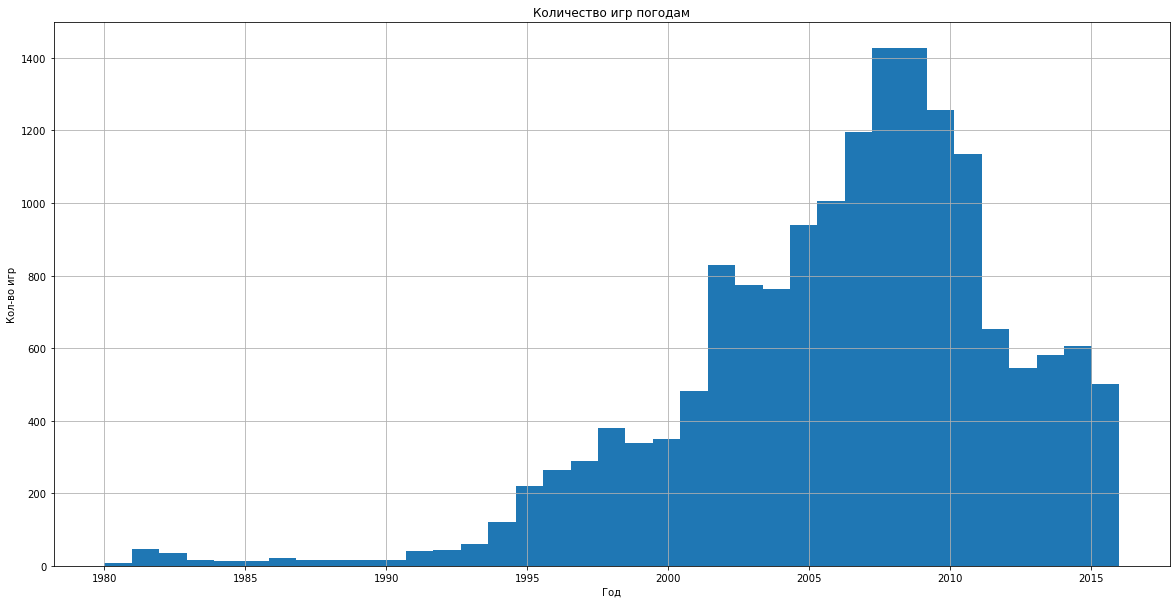

In [12]:
data['year_of_release'].hist(bins=37, figsize=(20,10))\
    .set(title = 'Количество игр погодам', xlabel = 'Год', ylabel = 'Кол-во игр')

Посчитаем количество оценок в колонках critic_score, rating, user_score по годам:

In [13]:
data.pivot_table(index='year_of_release', values=['critic_score', 'user_score', 'rating'], aggfunc=['count'])

count                  
                critic_score rating user_score
year_of_release                               
1980.0                     0      0          0
1981.0                     0      0          0
1982.0                     0      0          0
1983.0                     0      0          0
1984.0                     0      0          0
1985.0                     1      1          1
1986.0                     0      0          0
1987.0                     0      0          0
1988.0                     1      1          1
1989.0                     0      0          0
1990.0                     0      0          0
1991.0                     0      0          0
1992.0                     1      2          1
1993.0                     0      0          0
1994.0                     1      1          1
1995.0                     0      0          0
1996.0                     8      7          8
1997.0                    17     19         19
1998.0                    28     32         31
1999.0                    39     42         39
2000.0                   143    148        150
2001.0                   326    339        339
2002.0                   627    655        656
2003.0                   585    613        611
2004.0                   561    598        596
2005.0                   655    706        704
2006.0                   620    678        676
2007.0                   692    821        821
2008.0                   715    981        987
2009.0                   651   1011       1019
2010.0                   500    799        798
2011.0                   500    703        718
2012.0                   321    355        363
2013.0                   273    316        319
2014.0                   261    345        350
2015.0                   225    315        335
2016.0                   232    280        296

**Можно сделать вывод:**

На заре развития индустрии компьютерных игр, игры не оценивались.  Кроме того, выполнить поставленную задачу - выявить определяющие успешность игры закономерности, помешают начальные годы, так как на оценку игры могли повлиять революционные решения (например: новый жанр игры). Удалим данные до 2001 года:   

In [14]:
data = data[data['year_of_release']>2000]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14120 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             14120 non-null  object 
 1   platform         14120 non-null  object 
 2   year_of_release  14120 non-null  float64
 3   genre            14120 non-null  object 
 4   na_sales         14120 non-null  float64
 5   eu_sales         14120 non-null  float64
 6   jp_sales         14120 non-null  float64
 7   other_sales      14120 non-null  float64
 8   critic_score     7744 non-null   float64
 9   user_score       9588 non-null   object 
 10  rating           9515 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.3+ MB


**Изменим тип данных в столбце 'year_of_release' для возможности производить вычисления с данным столбцом:**

In [15]:
data['year_of_release'] = data['year_of_release'].astype('int')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14120 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             14120 non-null  object 
 1   platform         14120 non-null  object 
 2   year_of_release  14120 non-null  int32  
 3   genre            14120 non-null  object 
 4   na_sales         14120 non-null  float64
 5   eu_sales         14120 non-null  float64
 6   jp_sales         14120 non-null  float64
 7   other_sales      14120 non-null  float64
 8   critic_score     7744 non-null   float64
 9   user_score       9588 non-null   object 
 10  rating           9515 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.2+ MB


**Посмотрим, почему колонка user_score имеет тип object:**

In [17]:
data['user_score'].unique()

array(['8', '8.3', '8.5', '6.6', '8.4', nan, '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '7', '7.3', '4.3', '7.6',
       '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '6.8', '6.1', '6.7',
       '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '9.2', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '9.4', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1.2', '1', '9.7'],
      dtype=object)

В колонке user_score встречается значение 'tbd' (подлежит определению). В таком случае заменим все пропуски в данной колонке значением 'tbd':

In [18]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)

Изменим тип данных к колонке user_score на float, для возможности вычислений:

In [19]:
data['user_score'] = data['user_score'].astype('float')

**Оценим значения в столбце rating:**

In [20]:
data['rating'].value_counts()

E       3798
T       2807
M       1508
E10+    1392
EC         8
AO         1
RP         1
Name: rating, dtype: int64

Рейтинг RP означает «рейтинг ожидается», заменим все пропуски значением RP:

In [21]:
data['rating'] = data['rating'].fillna('RP')

**Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец:**

In [22]:
data['sum_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [23]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,RP,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,RP,0.01


### Исследовательский анализ данных

**Итого, имеем таблицу с данными по играм с 2001 по 2016 год:**

[Text(0.5, 1.0, 'Количество игр погодам'),
 Text(0.5, 0, 'Год'),
 Text(0, 0.5, 'Кол-во игр')]

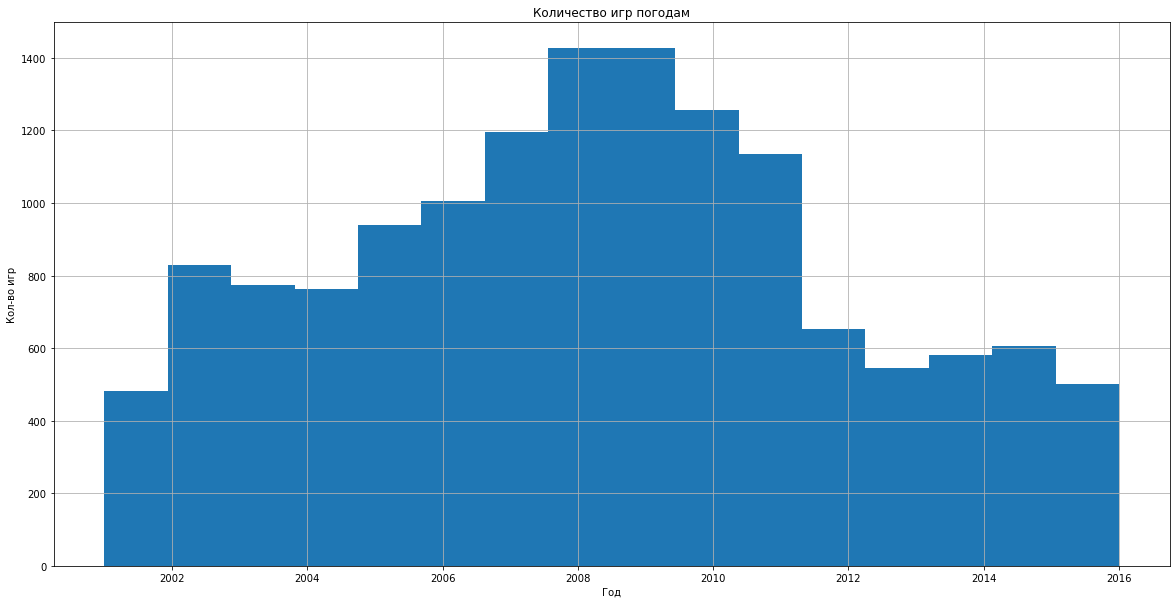

In [24]:
data['year_of_release'].hist(bins=16, figsize=(20,10))\
    .set(title = 'Количество игр погодам', xlabel = 'Год', ylabel = 'Кол-во игр')

**Посмотрим, как менялись продажи по платформам. Выведем десять платформ с максимальными суммарными продажами:**

In [25]:
top_platform = data.pivot_table(
    index='platform', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'sum_sales'], aggfunc='sum'
).sort_values(by='sum_sales', ascending=False).head(10)
top_platform

,eu_sales,jp_sales,na_sales,other_sales,sum_sales
platform,,,,,
PS2,321.99,128.67,556.84,186.89,1194.39
X360,268.32,12.30,595.74,84.88,961.24
PS3,327.21,79.41,390.13,134.59,931.34
Wii,258.32,68.28,486.87,77.71,891.18
DS,188.41,175.00,380.31,59.04,802.76
PS4,141.09,15.96,108.74,48.35,314.14
GBA,74.57,46.56,184.07,7.61,312.81
PSP,65.62,75.88,107.27,40.76,289.53
3DS,61.27,100.62,82.65,13.27,257.81


Лидером по продажам, с хорошим отрывом, является PS2. Второе и третье место у X360 и PS3 соответственно.

**Построим распределение суммарных продаж по годам:**

In [26]:
sales_year = data.pivot_table(
    index='platform', columns='year_of_release', values='sum_sales', aggfunc='sum'
)

Добавим срок жизни платформы (количество лет с продажами):

In [27]:
sales_year['lifespan'] = (~sales_year.isna()).sum(axis=1) 
sales_year

year_of_release,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,lifespan
platform,,,,,,,,,,,,,,,,,
3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.20,51.36,56.57,43.76,27.78,15.14,6
DC,1.07,0.29,NaN,NaN,NaN,NaN,0.02,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
DS,NaN,NaN,NaN,17.27,130.14,119.81,146.94,145.31,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN,10
GB,9.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
GBA,61.53,74.16,56.67,77.91,33.86,5.28,3.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
GC,26.34,51.81,50.61,28.82,27.62,11.26,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
N64,3.25,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
PC,5.47,8.57,8.84,10.39,4.37,2.85,9.28,12.42,16.91,24.28,35.03,23.22,12.38,13.28,8.52,5.25,16
PS,35.59,6.67,2.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3


In [28]:
sales_year['lifespan'].mean()

7.05

Средний срок жизни платформы 7 лет. Это результат довольно грубый, так как на него влияют платформы, которые начали существование до 2001 года и новые платформы, которые только появились, т.е значения по продажам "обрублены". Скорее всего реальный средний срок жизни немного больше.

**Сделаем таблицу топовых платфом с разбивкой по годам. Объединим таблицу top_platform и sales_year (метод join по умолчанию использует параметр left):**

In [29]:
topplatform_sales = top_platform.join(sales_year)
topplatform_sales

,eu_sales,jp_sales,na_sales,other_sales,sum_sales,2001,2002,2003,2004,2005,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,lifespan
platform,,,,,,,,,,,,,,,,,,,,,
PS2,321.99,128.67,556.84,186.89,1194.39,166.43,205.38,184.31,211.81,160.66,...,53.90,26.40,5.64,0.45,NaN,NaN,NaN,NaN,NaN,11
X360,268.32,12.30,595.74,84.88,961.24,NaN,NaN,NaN,NaN,8.25,...,135.26,120.29,170.03,143.84,99.74,88.58,34.74,11.96,1.52,12
PS3,327.21,79.41,390.13,134.59,931.34,NaN,NaN,NaN,NaN,NaN,...,118.52,130.93,142.17,156.78,107.36,113.25,47.76,16.82,3.60,11
Wii,258.32,68.28,486.87,77.71,891.18,NaN,NaN,NaN,NaN,NaN,...,171.32,206.97,127.95,59.65,21.71,8.59,3.75,1.14,0.18,11
DS,188.41,175.00,380.31,59.04,802.76,NaN,NaN,NaN,17.27,130.14,...,145.31,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN,10
PS4,141.09,15.96,108.74,48.35,314.14,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,25.99,100.00,118.90,69.25,4
GBA,74.57,46.56,184.07,7.61,312.81,61.53,74.16,56.67,77.91,33.86,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
PSP,65.62,75.88,107.27,40.76,289.53,NaN,NaN,NaN,7.06,43.84,...,34.55,37.78,35.04,17.82,7.69,3.14,0.24,0.12,NaN,12
3DS,61.27,100.62,82.65,13.27,257.81,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,63.20,51.36,56.57,43.76,27.78,15.14,6


In [30]:
topplatform_sales['lifespan'].mean()

9.2

У топовых платформ средний срок жизни 9 лет. Эта выборка более презентативна, так как сюда меньше попало "обрубленных" значений. 

**Можно сказать, что характерный срок, за который появляются новые и исчезают старые платформы 7-9 лет. Кроме того, наблюдаем, что лидер по продажам PS2 с 2011 ничего не продает.**

**Определим какие платформы на данный момент еще продают:**

In [31]:
platform_years=data.groupby(['platform', 'year_of_release'])['sum_sales'].sum().reset_index() #сгруппируем таблицу по для построения графика

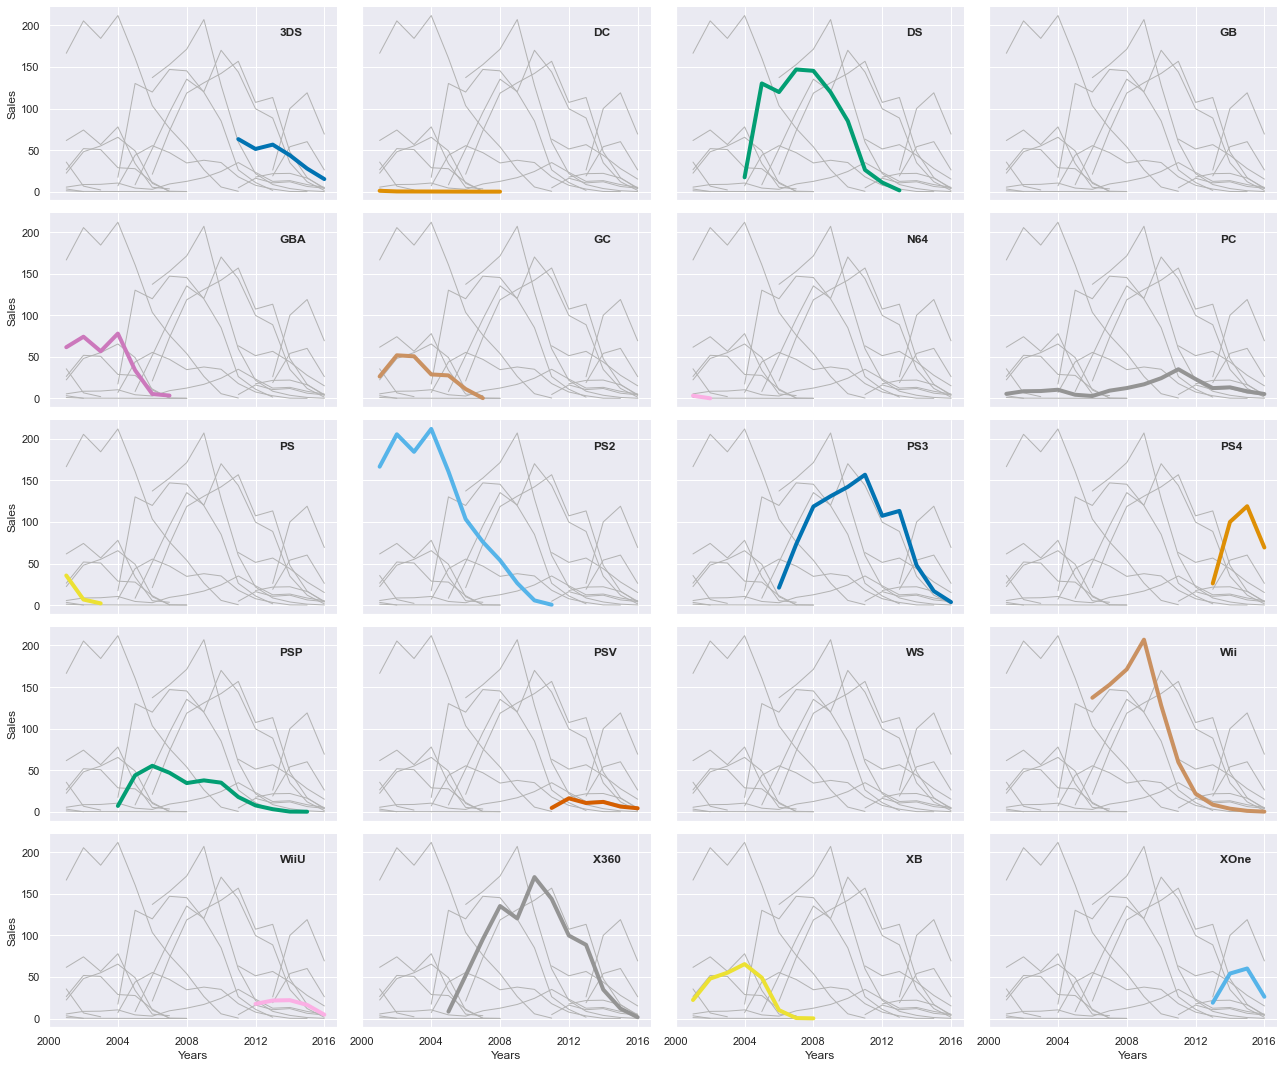

In [32]:
sns.set_theme(style="darkgrid")
platform_plot = sns.relplot(
    data=platform_years,
    x="year_of_release", y="sum_sales", col="platform", hue="platform",
    kind="line", palette="colorblind", linewidth=4, zorder=5,
    col_wrap=4, height=3, aspect=1.5, legend=False,
)

for platform, ax in platform_plot.axes_dict.items():
    ax.text(.8, .85, platform, transform=ax.transAxes, fontweight="bold")

    sns.lineplot(
        data=platform_years, x="year_of_release", y="sum_sales", units="platform",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

ax.set_xticks(ax.get_xticks()[::2])

platform_plot.set_titles("")
platform_plot.set_axis_labels("Years", "Sales")
platform_plot.tight_layout()

Определим какие платформы продают на момент 2016 года:

In [33]:
data[data['year_of_release']==2016].groupby('platform')['sum_sales'].sum().sort_values(ascending=False) 

platform
PS4     69.25
XOne    26.15
3DS     15.14
PC       5.25
WiiU     4.60
PSV      4.25
PS3      3.60
X360     1.52
Wii      0.18
Name: sum_sales, dtype: float64

**Имея данные какие платформы еще продают и в соответствии с графиками можем сделать вывод:** 
- Платформы PS3, X360, Wii прошли свои пики популярности и в скором времени игры на этих приставках перестанут продаваться. Вкладывать деньги в разработку игр на этих платформах не имеет смысла.
- Платформы WiiU, PSV хоть и не достигли срока жизни 7-9 лет, но продажи на них никогда не были высокими. Вкладывать деньги в разработку игр на этих платформах не рекомендуется.
- Платформа PC хоть и имеет средние продажи, однако обладает стабильностью продаж в течении времени. Вкладывать деньги в разработку игр на этой платформе рекомендуется.
- Платформы PS4, XOne, 3DS не достигли срока жизни, имеют продажи, имеют нисходящий тренд в 2016 году, так как за последний год данные скорее всего неполные. Вкладывать деньги в разработку игр на этих платформах обязательно.

**Создадим таблицу с данными только по актуальным платформам ('PS4', 'XOne', '3DS', 'PC'):**

In [34]:
platform_list = ['PS4', 'XOne', '3DS', 'PC']
actual_platform = data[data['platform'].isin(platform_list)]

**Построим "ящик с усами" для суммарных продаж актуальных платформ:**

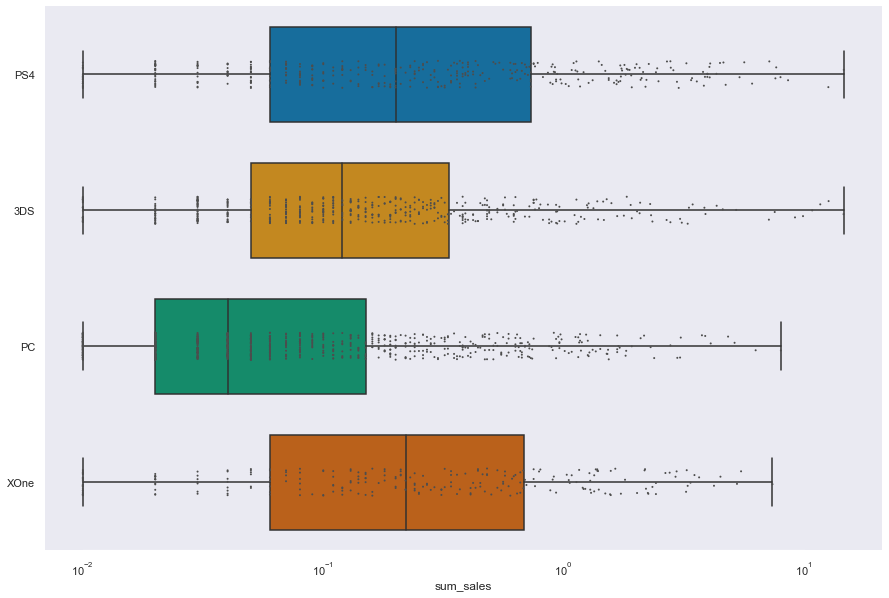

In [35]:
# создаем фигуру, создадим логарифмическую шкалу
f, ax = plt.subplots(figsize=(15, 10))
ax.set_xscale("log")

# стоим "ящики с усами" для выбраных платформ
sns.boxplot(x="sum_sales", y="platform", data=actual_platform,
            whis=[0, 100], width=.7, palette="colorblind")

# добавим точки в "ящик с усами" для наглядности
sns.stripplot(x="sum_sales", y="platform", data=actual_platform,
              size=2, color=".3", linewidth=0)


# уберем сетку, уберем надпись "платформы", выровняем ящики
ax.xaxis.grid(False)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

Медианное количество проданых копий игр на платформах 'PS4' и 'XOne' примерно одинаковое. На платформе '3DS' медианное количество немного меньше. На платформе PC игры меньше всего продавались (не зря выход на платформу PC  у нас под вопросом). 


    
**Определим актуальный период, данные за который помогут построить прогноз на 2017 год. Предлагаю выбрать начало периода - начальный год в таблице "actual_platform" (за исключением платформы PC, из-за её стабильности) плюс один год, конец периода 2016 год:**

In [36]:
actual_platform[actual_platform['platform']!='PC']['year_of_release'].min() 

2011



**Актуальный период будем считать 2012 - 2016 года.**

**Кроме того, будем иметь ввиду, что:** 
- в 2007-2010 годах был "бум" компьюторных игр, поэтому в актуальном периоде можем наблюдать нисходящий тренд;
- в 2016 году данные неполные, так как год еще "не закрыт", поэтому на графиках в 2016 году будем наблюдать падение.

In [37]:
data_actualperiod = data[data['year_of_release']>2011]

**Исследуем, как влияют на продажи внутри одной платформы (возьмем PS4) отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.**

In [38]:
PS4 = actual_platform[actual_platform['platform']=='PS4'] #таблица с данными по PS4

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами критиков и продажами:

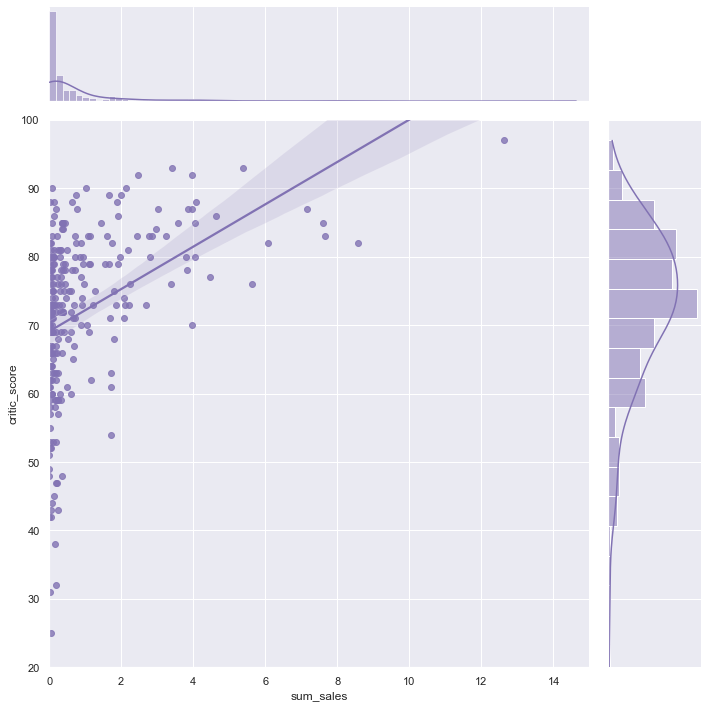

In [39]:
sns.jointplot(x="sum_sales", y="critic_score", data=PS4,
              kind="reg", truncate=False, 
              xlim=(0, 15), ylim=(20, 100), 
              color="m", height=10)

In [40]:
PS4['sum_sales'].corr(PS4['critic_score'])

0.40656790206178123

Вывод:

Имеется средняя зависимость (корреляция - 0.41) между оценкой критика и количеством продаж. Наиболее частые оценки 70-85. Большинсво игр не имели успеха независимо от успеха у критиков.

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами пользователей и продажами:

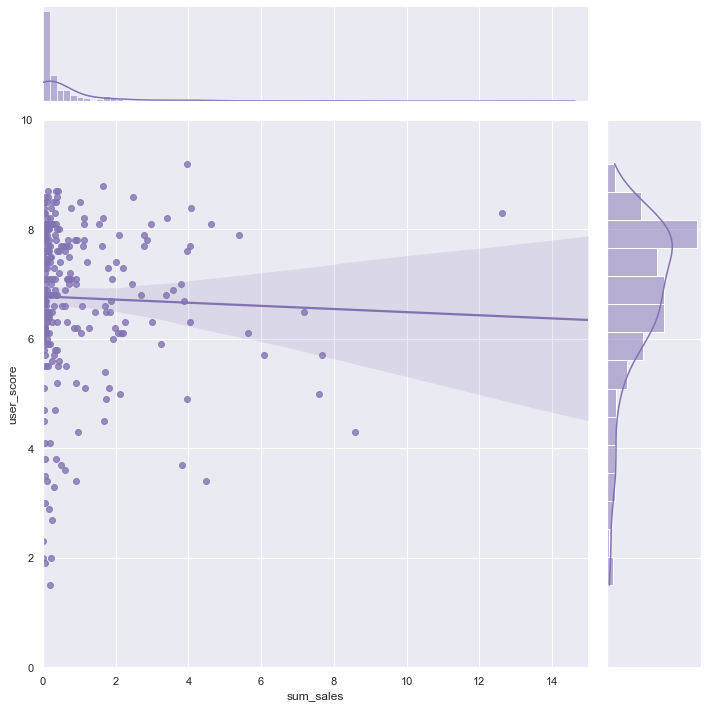

In [41]:
sns.jointplot(x="sum_sales", y="user_score", data=PS4,
              kind="reg", truncate=False, 
              xlim=(0, 15), ylim=(0, 10), 
              color="m", height=10)

In [42]:
PS4['sum_sales'].corr(PS4['user_score'])

-0.03195711020455643

Вывод:

Зависимости между оценкой пользователя и количеством продаж нет. Наиболее частые оценки 6-8. Большинсво игр не имели успеха независимо от оценки.



**Исследуем, как влияют на продажи внутри другой платформы (возьмем XOne) отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.**

In [43]:
XOne = data_actualperiod[data_actualperiod['platform']=='XOne']



Построим диаграмму рассеяния и посчитаем корреляцию между отзывами критиков и продажами:

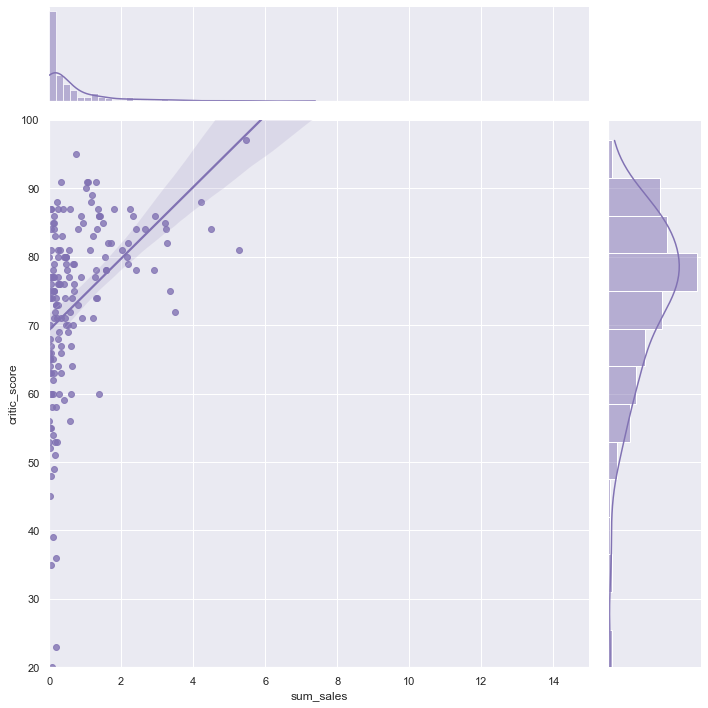

In [44]:
sns.jointplot(x="sum_sales", y="critic_score", data=XOne,
              kind="reg", truncate=False, 
              xlim=(0, 15), ylim=(20, 100), 
              color="m", height=10)

In [45]:
XOne['sum_sales'].corr(XOne['critic_score'])

0.41699832800840153



Вывод:

Зависимость между оценкой критика и количеством продаж XOne повтояряет зависимость PS4. Имеется средняя зависимость (корреляция - 0.42) между оценкой критика и количеством продаж. Наиболее частые оценки 75-85. Большинсво игр не имели успеха независимо от успеха у критиков.


    
Построим диаграмму рассеяния и посчитаем корреляцию между отзывами пользователей и продажами:   

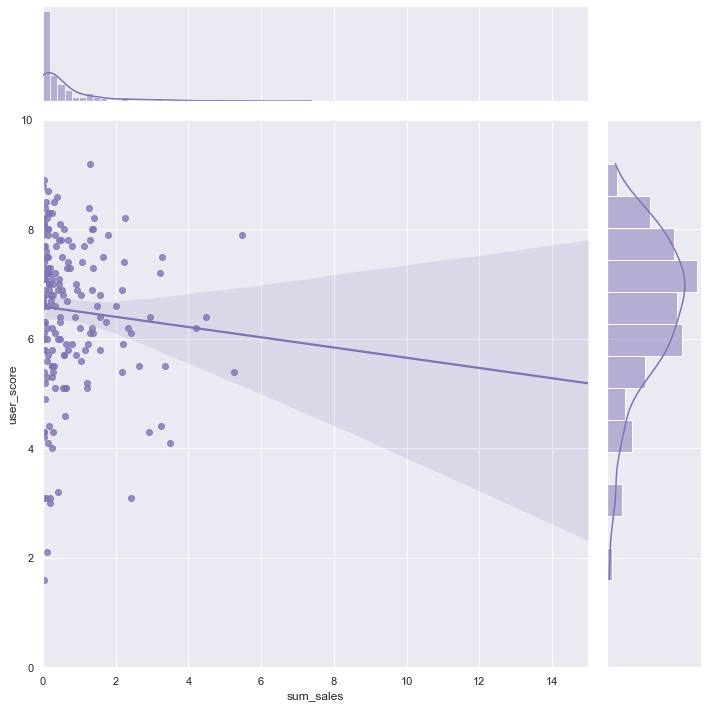

In [46]:
sns.jointplot(x="sum_sales", y="user_score", data=XOne,
              kind="reg", truncate=False, 
              xlim=(0, 15), ylim=(0, 10), 
              color="m", height=10)

In [47]:
XOne['sum_sales'].corr(XOne['user_score'])

-0.06892505328279418


Вывод:

Наблюдаем очень слабую отрицательную корреляцию (-0,07), которая не позволяет говорить о какой либо зависимости. Наиболее частые оценки 6-8. Большинсво игр не имели успеха независимо от оценки.



**Исследуем, как влияют на продажи внутри другой платформы (возьмем 3DS) отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.**

In [48]:
data_3DS = data_actualperiod[data_actualperiod['platform']=='3DS']



Построим диаграмму рассеяния и посчитаем корреляцию между отзывами критиков и продажами:

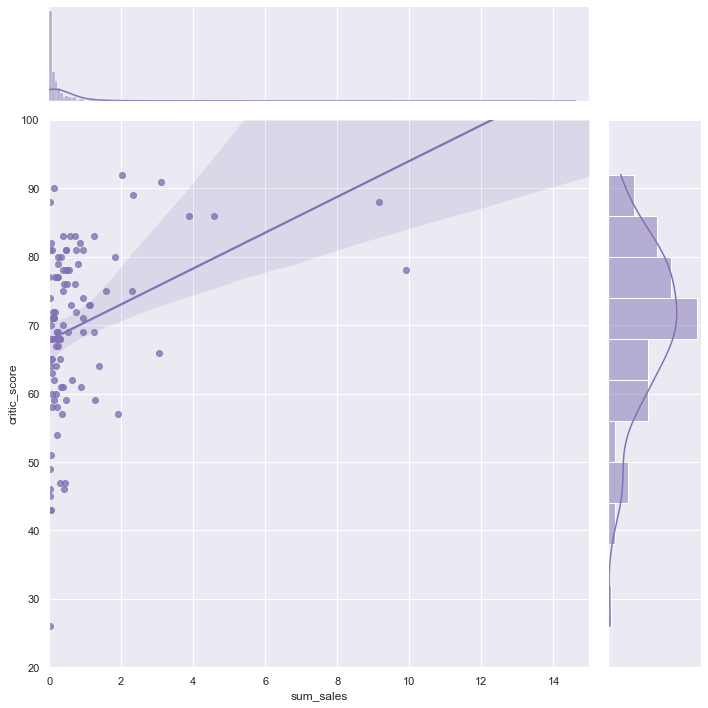

In [49]:
sns.jointplot(x="sum_sales", y="critic_score", data=data_3DS,
              kind="reg", truncate=False, 
              xlim=(0, 15), ylim=(20, 100), 
              color="m", height=10)

In [50]:
data_3DS['sum_sales'].corr(data_3DS['critic_score'])

0.32080286953607856



Вывод:

Зависимость между оценкой критика и количеством продаж 3DS меньше чем у предыдущих платформ (корреляция - 0.32). Наиболее частые оценки 65-75. Большинсво игр не имели успеха независимо от успеха у критиков.


    
Построим диаграмму рассеяния и посчитаем корреляцию между отзывами пользователей и продажами:   

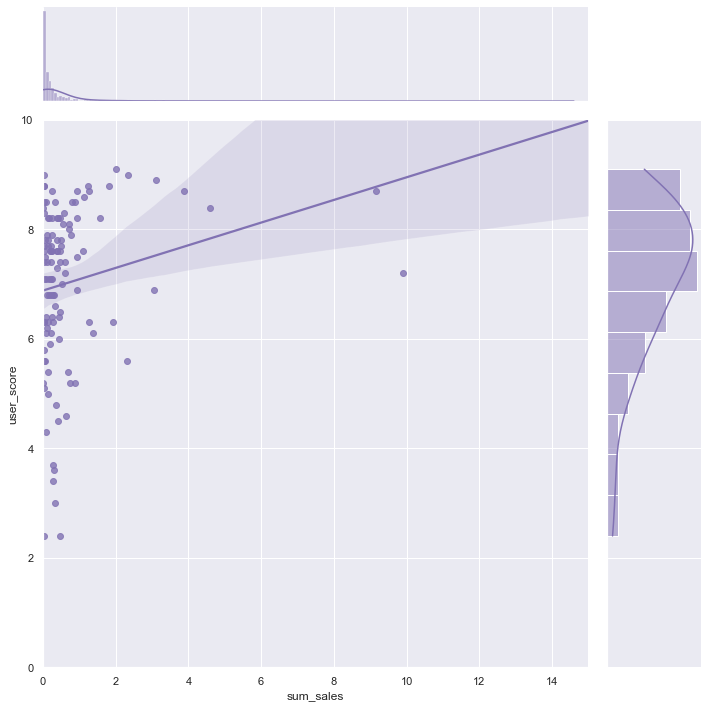

In [51]:
sns.jointplot(x="sum_sales", y="user_score", data=data_3DS,
              kind="reg", truncate=False, 
              xlim=(0, 15), ylim=(0, 10), 
              color="m", height=10)

In [52]:
data_3DS['sum_sales'].corr(data_3DS['user_score'])

0.19758263411038596



Вывод:

Наблюдаем слабую корреляцию (0,2). Это отличает данную платформу от предыдущих исследований, у которыйх нет зависимости между оценкой пользователей и количеством продаж. Наиболее частые оценки 7-8. Большинсво игр не имели успеха независимо от оценки.



**Исследуем, как влияют на продажи за актуальный период (2012-2016 года) отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.**

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами критиков и продажами:

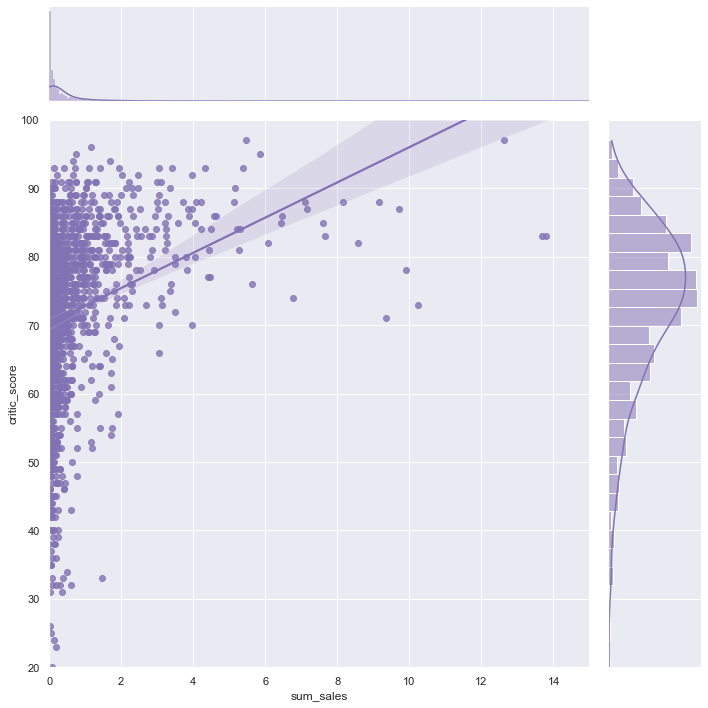

In [53]:
sns.jointplot(x="sum_sales", y="critic_score", data=data_actualperiod,
              kind="reg", truncate=False, 
              xlim=(0, 15), ylim=(20, 100), 
              color="m", height=10)

In [54]:
data_actualperiod['sum_sales'].corr(data_actualperiod['critic_score'])

0.3081967459207776



Вывод:

Имеется средняя зависимость (корреляция - 0.31) между оценкой критика и количеством продаж. Наиболее частые оценки 70-85. Большинсво игр не имели успеха независимо от успеха у критиков. Зависимость за актуальный период близка к зависимости внутри платформ PS4, XOne, 3DS.

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами пользователей и продажами:

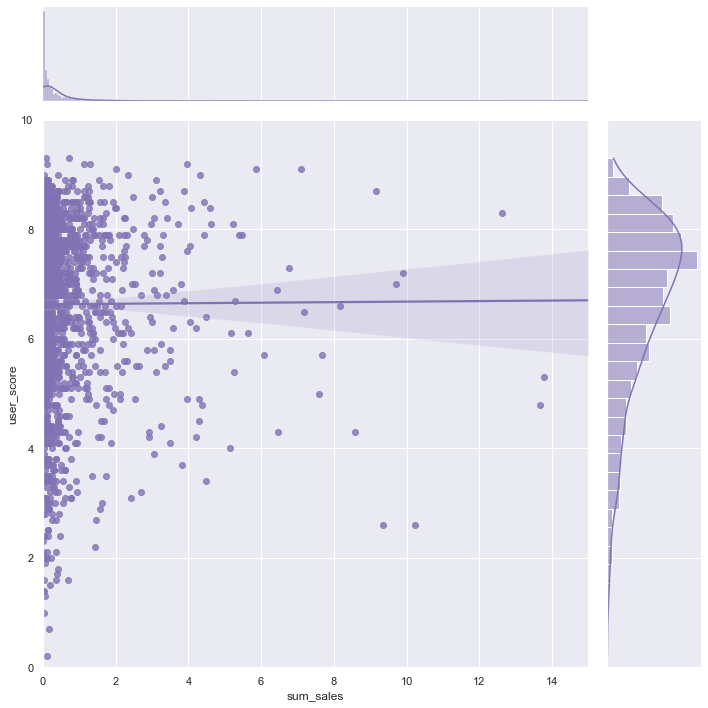

In [55]:
sns.jointplot(x="sum_sales", y="user_score", data=data_actualperiod,
              kind="reg", truncate=False, 
              xlim=(0, 15), ylim=(0, 10), 
              color="m", height=10)

In [56]:
data_actualperiod['sum_sales'].corr(data_actualperiod['user_score'])

0.004428817675493268



Вывод:

Зависимости между оценкой пользователя и количеством продаж нет. Наиболее частые оценки 7-8. Большинсво игр не имели успеха независимо от оценки. Зависимость за актуальный период близка к зависимостям PS4, XOne. У платформы 3DS наблюдали небольшую отрицательную корреляцию, соответственно, если мы продолжим исследование, то у каких-то платформ найдем небольшую положительную корреляцию.

**Исследуем общее распределение игр по жанрам.**

Построим графики продаж по жанрам:

In [57]:
genre_years=data.groupby(['genre', 'year_of_release'])['sum_sales'].sum().reset_index() #сгруппируем таблицу по для построения графика

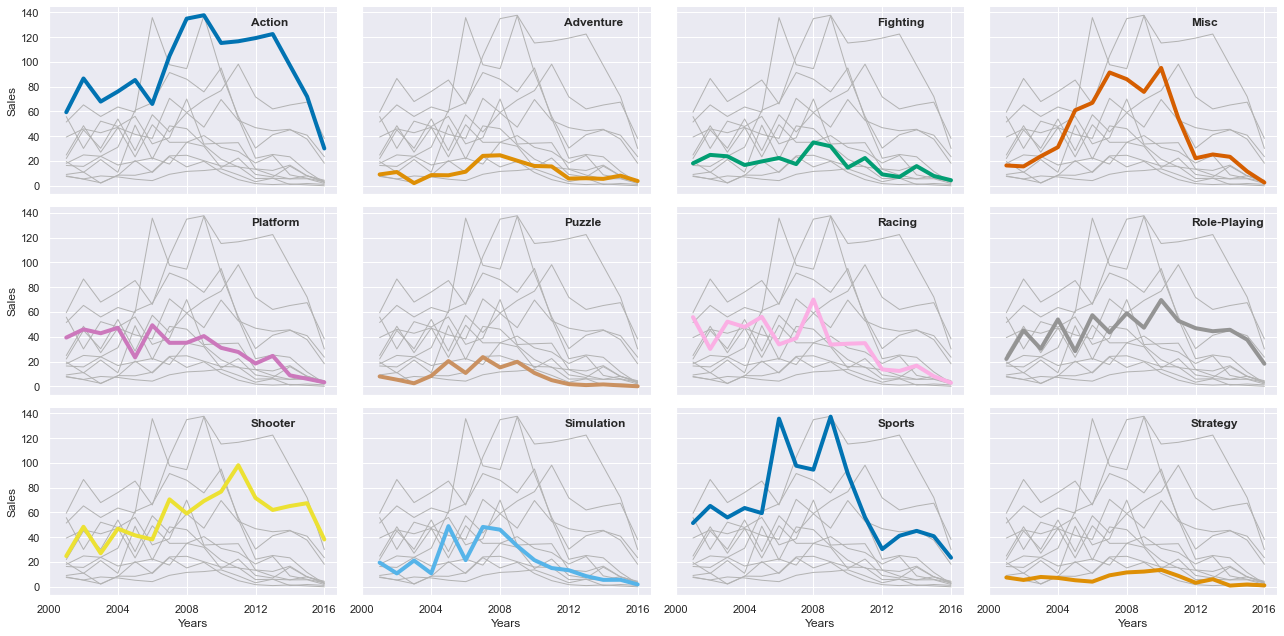

In [58]:
genre_plot = sns.relplot(
    data=genre_years,
    x="year_of_release", y="sum_sales", col="genre", hue="genre",
    kind="line", palette="colorblind", linewidth=4, zorder=5,
    col_wrap=4, height=3, aspect=1.5, legend=False,
)

for platform, ax in genre_plot.axes_dict.items():
    ax.text(.7, .9, platform, transform=ax.transAxes, fontweight="bold")

    sns.lineplot(
        data=genre_years, x="year_of_release", y="sum_sales", units="genre",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

ax.set_xticks(ax.get_xticks()[::2])

genre_plot.set_titles("")
genre_plot.set_axis_labels("Years", "Sales")
genre_plot.tight_layout()

С 2001 по 2016 года хорошо продавались игры жанров Action, Misc, Sports, Shooter. Средне продавались - Platform, Racing, Role-Playing, Simulation. Плохо продавались - Adventure, Flighting, Puzzle, Strategy.

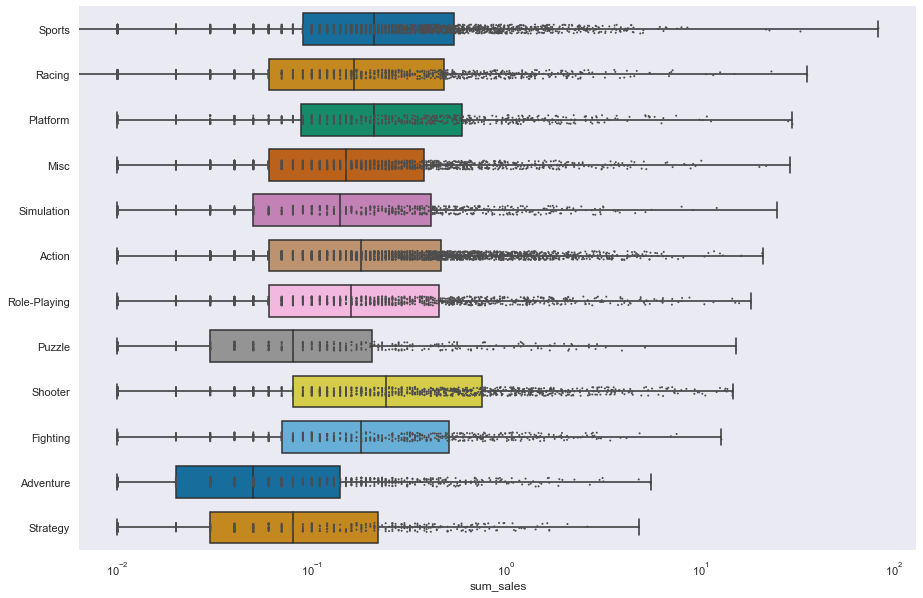

In [59]:
# создаем фигуру, создадим логарифмическую шкалу
f, ax = plt.subplots(figsize=(15, 10))
ax.set_xscale("log")

# стоим "ящики с усами" для выбраных платформ
sns.boxplot(x="sum_sales", y="genre", data=data,
            whis=[0, 100], width=.7, palette="colorblind")

# добавим точки в "ящик с усами" для наглядности
sns.stripplot(x="sum_sales", y="genre", data=data,
              size=2, color=".3", linewidth=0)


# уберем сетку, уберем надпись "платформы", выровняем ящики
ax.xaxis.grid(False)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

По "ящику с усами" можно сказать, что: 
- медианное количество копий у жанров Adventure, Strategy, Puzzle ниже, чем у других жарнов;
- медианное количество копий выбивается в большую сторону у жанра Shooter;
- у остальных жанров медианное количество копий примерно одинаково. 

**Исследуем общее распределение игр по жанрам за актуальный период:**

Построим графики продаж по жанрам за актуальный период:

In [60]:
actualgenre_years=data_actualperiod.groupby(['genre', 'year_of_release'])['sum_sales'].sum().reset_index() #сгруппируем таблицу по для построения графика

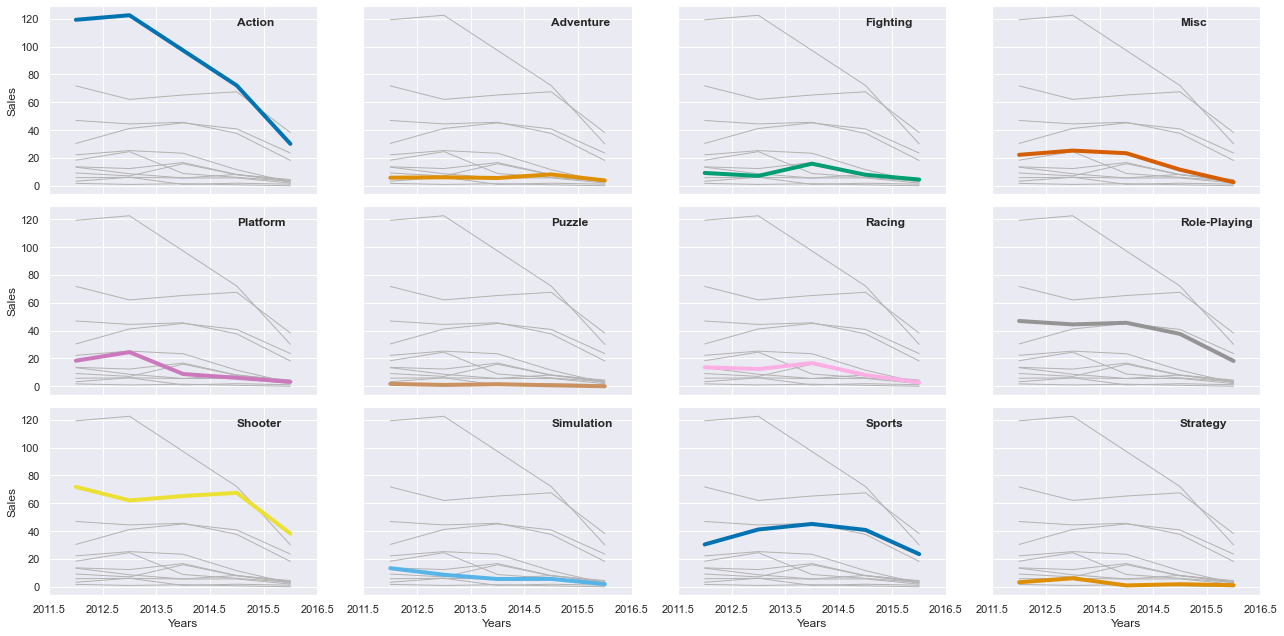

In [61]:
actualgenre_plot = sns.relplot(
    data=actualgenre_years,
    x="year_of_release", y="sum_sales", col="genre", hue="genre",
    kind="line", palette="colorblind", linewidth=4, zorder=5,
    col_wrap=4, height=3, aspect=1.5, legend=False,
)

for platform, ax in actualgenre_plot.axes_dict.items():
    ax.text(.7, .9, platform, transform=ax.transAxes, fontweight="bold")

    sns.lineplot(
        data=actualgenre_years, x="year_of_release", y="sum_sales", units="genre",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

ax.set_xticks(ax.get_xticks()[::2])

actualgenre_plot.set_titles("")
actualgenre_plot.set_axis_labels("Years", "Sales")
actualgenre_plot.tight_layout()

За актуальный период отлично продавались игры жанров Action, Shooter. Хорошо продавались - Sports, Role-Playing. Плохо продавались - Adventure, Flighting, Puzzle, Strategy, Misc, Platform, Racing Simulation. 

Картина несколько изменилась, когда мы взяли только актуальный период. Можно отметить, что жанры Action и Shooter остались в лидерах.

Построим "ящик с усами" за актуальный период:

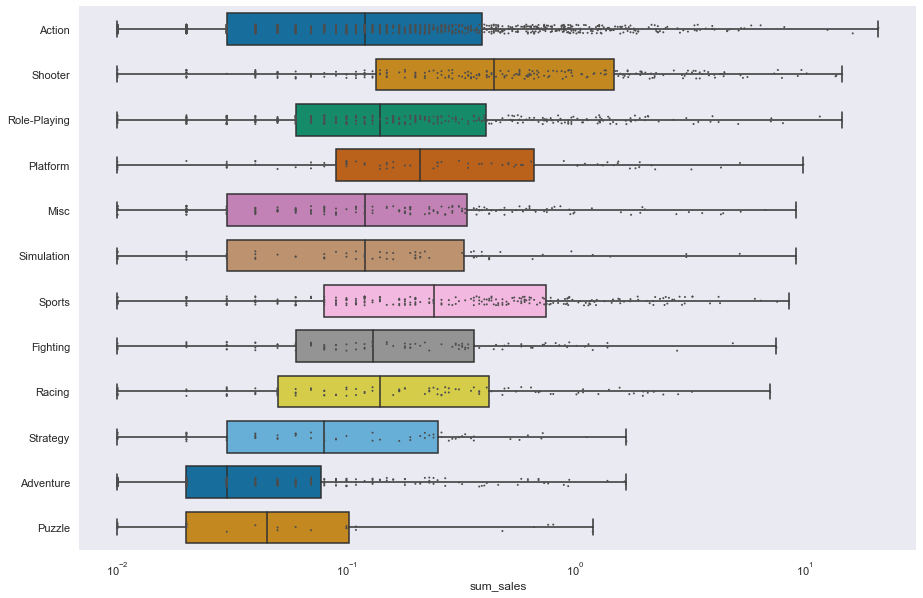

In [62]:
# создаем фигуру, создадим логарифмическую шкалу
f, ax = plt.subplots(figsize=(15, 10))
ax.set_xscale("log")

# стоим "ящики с усами" для выбраных платформ
sns.boxplot(x="sum_sales", y="genre", data=data_actualperiod,
            whis=[0, 100], width=.7, palette="colorblind")

# добавим точки в "ящик с усами" для наглядности
sns.stripplot(x="sum_sales", y="genre", data=data_actualperiod,
              size=2, color=".3", linewidth=0)


# уберем сетку, уберем надпись "платформы", выровняем ящики
ax.xaxis.grid(False)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

По "ящику с усами" за актуальный период можно сказать, что: 
- медианное количество копий у жанров Adventure, Strategy, Puzzle ниже, чем у других жарнов;
- медианное количество копий выбивается в большую сторону у жанра Shooter;
- у остальных жанров медианное количество копий примерно одинаково. 

В данном случае распределение за актуальный период примерно повторяет распределение общее.

**Проведя исследование по жанрам можно сказать, что для создания игры в 2017 году в первую очередь стоит обратить внимание на жанр Shooter, во вторую очередь на жанр Action и в третью - жанры Sport и Role-Playing.**

### Составим портрет пользователя каждого региона.



**Проведем исследование по продажам на платформах за актуальный период. Построим круговые диаграммы топ платформ по регионам:**

In [63]:
pl_na_actualperiod = data_actualperiod.groupby('platform')\
.sum().sort_values(by='na_sales', ascending=False).reset_index() # создадим таблицу топ по NA за актуальный период
pl_na_actualperiod.loc[(pl_na_actualperiod.na_sales < 10), 'platform'] = 'other' # отфильтруем малые значения
pl_na_actualperiod = pl_na_actualperiod.groupby('platform')\
.sum().sort_values(by='na_sales', ascending=False).reset_index()

        
pl_eu_actualperiod = data_actualperiod.groupby('platform')\
.sum().sort_values(by='eu_sales', ascending=False).reset_index() # создадим таблицу топ по EU за актуальный период
pl_eu_actualperiod.loc[(pl_eu_actualperiod.eu_sales < 10), 'platform'] = 'other' # отфильтруем малые значения
pl_eu_actualperiod = pl_eu_actualperiod.groupby('platform')\
.sum().sort_values(by='eu_sales', ascending=False).reset_index()

pl_jp_actualperiod = data_actualperiod.groupby('platform')\
.sum().sort_values(by='jp_sales', ascending=False).reset_index() # создадим таблицу топ по JP за актуальный период
pl_jp_actualperiod.loc[(pl_jp_actualperiod.jp_sales < 10), 'platform'] = 'other' # отфильтруем малые значения
pl_jp_actualperiod = pl_jp_actualperiod.groupby('platform')\
.sum().sort_values(by='jp_sales', ascending=False).reset_index()

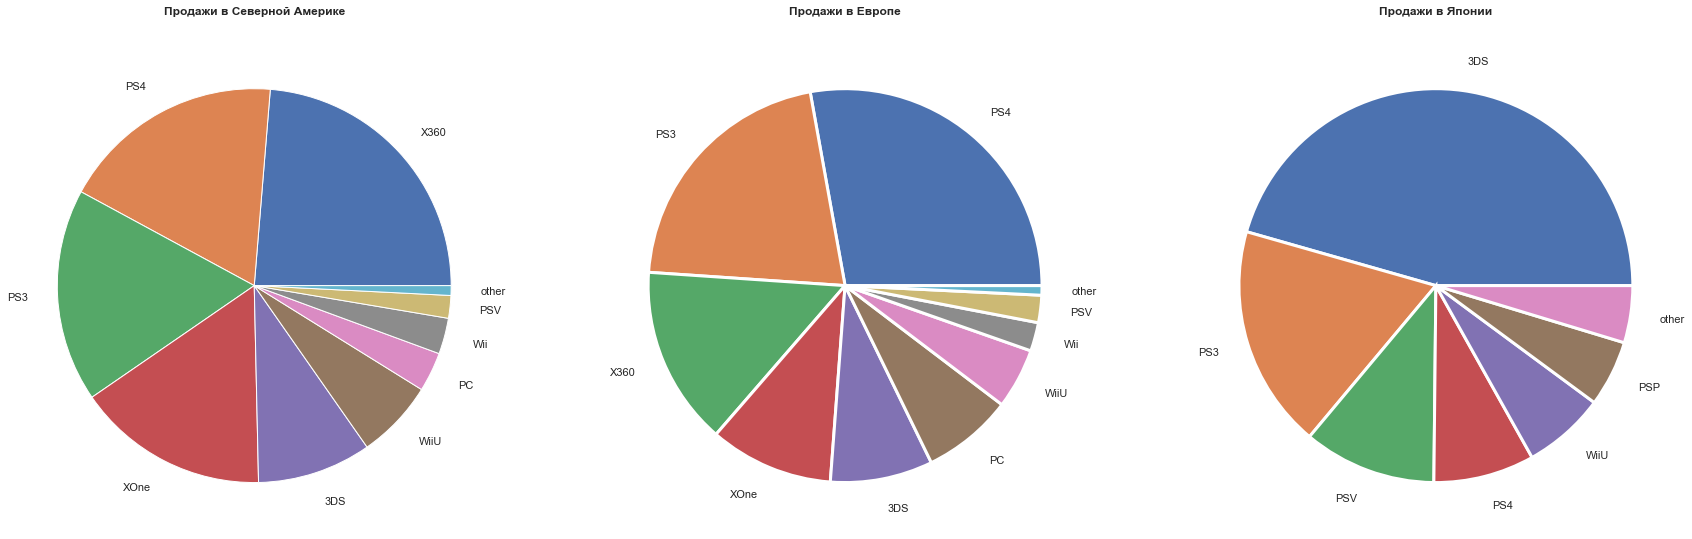

In [64]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 32))
ax1.pie(
    pl_na_actualperiod['na_sales'], 
    labels=pl_na_actualperiod['platform'], labeldistance=1.15, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }
)
ax1.set_title('Продажи в Северной Америке', fontweight='bold', pad=25)

ax2.pie(
    pl_eu_actualperiod['eu_sales'], 
    labels=pl_eu_actualperiod['platform'], labeldistance=1.15, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }
)
ax2.set_title('Продажи в Европе', fontweight='bold', pad=25)

ax3.pie(
    pl_jp_actualperiod['jp_sales'], 
    labels=pl_jp_actualperiod['platform'], labeldistance=1.15, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }
)
ax3.set_title('Продажи в Японии', fontweight='bold', pad=25)

plt.show()


    
**Вывод:**
    
В Северной Америке значительную часть рынка занимают американские платформы (на первом месте X360, на четвертом XOne). Вторая большая часть рынка у PS разных поколений (PS4 и PS3). Далее идут мобильные консоли и PC.  

В Европе большую часть рынка занимают PS (PS4 и PS3). X360 и XOne занимают значительную часть рынка, однако меньше, чем в Америке. Мобильные консоли меньше популярны в Европе, чем в Америке. А PC удалось незначительно больше рынка завоевать.

В Японии можно отметить абсолютную популярность мобильных консолей. И еще одна особенность, что PS3 продали больше, PS4 (можно говорить о консервативности японцев, которые медленнее переходят на новые поколения платформ). Американские платформы платформы абсолютно не популярны. 
     

**Проведём исследование по регионам по актуальным платформам.**

**Исследуем продажи по актуальным платформам в Северной Америке:** 

In [65]:
platform_sales_region = actual_platform.groupby('platform').sum().reset_index().sort_values("sum_sales", ascending=False) #сгруппируем таблицу по для построения графика

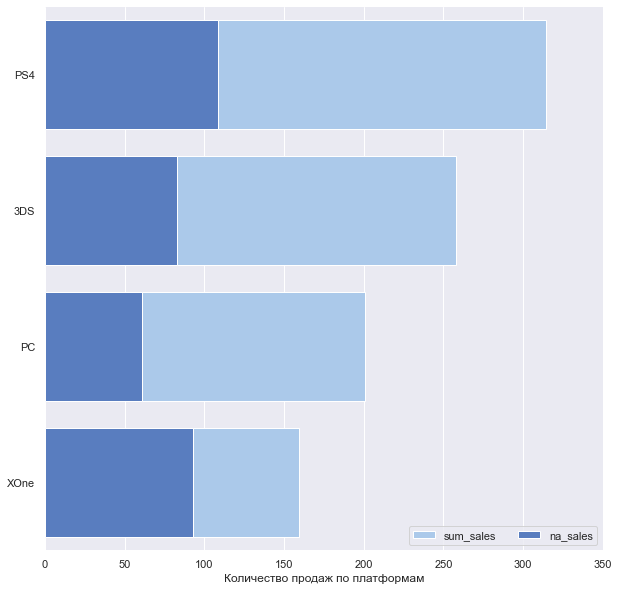

In [66]:
# создадим фигуру
f, ax = plt.subplots(figsize=(10, 10))

# нанесем суммарные продажи
sns.set_color_codes("pastel")
sns.barplot(x="sum_sales", y="platform", data=platform_sales_region,
            label="sum_sales", color="b")

# нанесем продажи NA
sns.set_color_codes("muted")
sns.barplot(x="na_sales", y="platform", data=platform_sales_region,
            label="na_sales", color="b")

# добавим легенду и информацию по осям
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 350), ylabel="",
       xlabel="Количество продаж по платформам")
sns.despine(left=True, bottom=True)

Наблюдаем, что по сравнению с мировым трендом в Северной Аммерике выделяется платформа XOne. Это можно связать с тем, что XOne платформа амереканского производства, что позволила ей лучше закрепиться на американском рынке.

**Исследуем продажи по актуальным платформам в Европе:** 

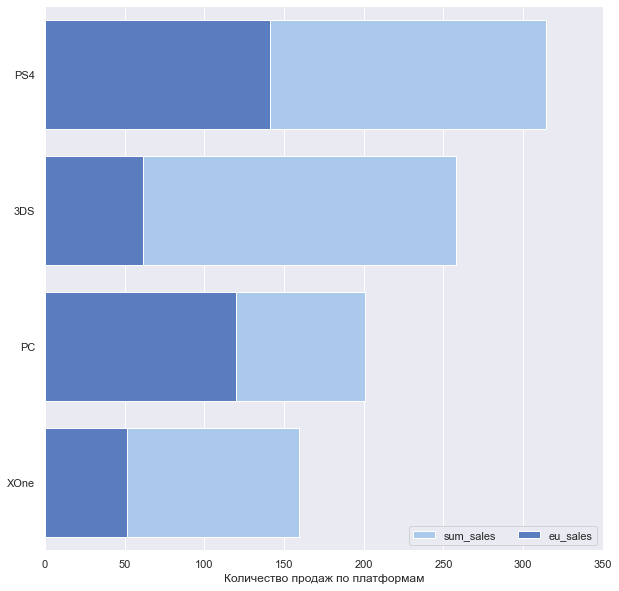

In [67]:
# создадим фигуру
f, ax = plt.subplots(figsize=(10, 10))

# нанесем суммарные продажи
sns.set_color_codes("pastel")
sns.barplot(x="sum_sales", y="platform", data=platform_sales_region,
            label="sum_sales", color="b")

# нанесем продажи EU
sns.set_color_codes("muted")
sns.barplot(x="eu_sales", y="platform", data=platform_sales_region,
            label="eu_sales", color="b")

# добавим легенду и информацию по осям
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 350), ylabel="",
       xlabel="Количество продаж по платформам")
sns.despine(left=True, bottom=True)

Пользователи Европы отличаются от мирового тренда повышенным количеством продаж на платформе PC. Возможно это вклад Восточной Европы, где игровые приставки обладают меньшей популярностью по сравнению с персональными компьютерами.

**Исследуем продажи по актуальным платформам в Японии:** 

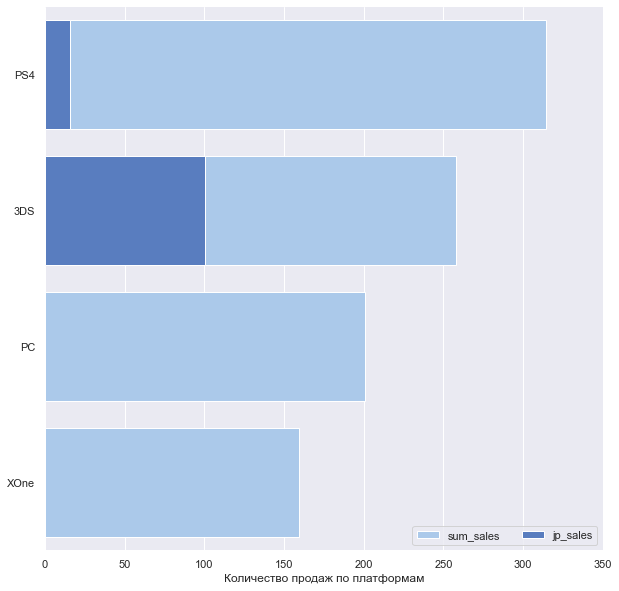

In [68]:
# создадим фигуру
f, ax = plt.subplots(figsize=(10, 10))

# нанесем суммарные продажи
sns.set_color_codes("pastel")
sns.barplot(x="sum_sales", y="platform", data=platform_sales_region,
            label="sum_sales", color="b")

# нанесем продажи JP
sns.set_color_codes("muted")
sns.barplot(x="jp_sales", y="platform", data=platform_sales_region,
            label="jp_sales", color="b")

# добавим легенду и информацию по осям
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 350), ylabel="",
       xlabel="Количество продаж по платформам")
sns.despine(left=True, bottom=True)

Исследование по Японии говорит о координальном отличии локального рынка по сравнению с мировым - на рынке зарубежные платформы абсолютно непопулярны и портативная игровая система приоритетнее консольной.



**Проведем исследование продаж по жанрам за актуальный период. Построим круговые диаграммы по регионам:**

In [69]:
genre_na_actualperiod = data_actualperiod.groupby('genre')\
.sum().sort_values(by='na_sales', ascending=False).reset_index() # создадим таблицу топ по NA за актуальный период
genre_na_actualperiod.loc[(genre_na_actualperiod.na_sales < 7), 'genre'] = 'other' # отфильтруем малые значения
genre_na_actualperiod = genre_na_actualperiod.groupby('genre')\
.sum().sort_values(by='na_sales', ascending=False).reset_index()

        
genre_eu_actualperiod = data_actualperiod.groupby('genre')\
.sum().sort_values(by='eu_sales', ascending=False).reset_index() # создадим таблицу топ по EU за актуальный период
genre_eu_actualperiod.loc[(genre_eu_actualperiod.eu_sales < 7), 'genre'] = 'other' # отфильтруем малые значения
genre_eu_actualperiod = genre_eu_actualperiod.groupby('genre')\
.sum().sort_values(by='eu_sales', ascending=False).reset_index()

genre_jp_actualperiod = data_actualperiod.groupby('genre')\
.sum().sort_values(by='jp_sales', ascending=False).reset_index() # создадим таблицу топ по JP за актуальный период
genre_jp_actualperiod.loc[(genre_jp_actualperiod.jp_sales < 7), 'genre'] = 'other' # отфильтруем малые значения
genre_jp_actualperiod = genre_jp_actualperiod.groupby('genre')\
.sum().sort_values(by='jp_sales', ascending=False).reset_index()

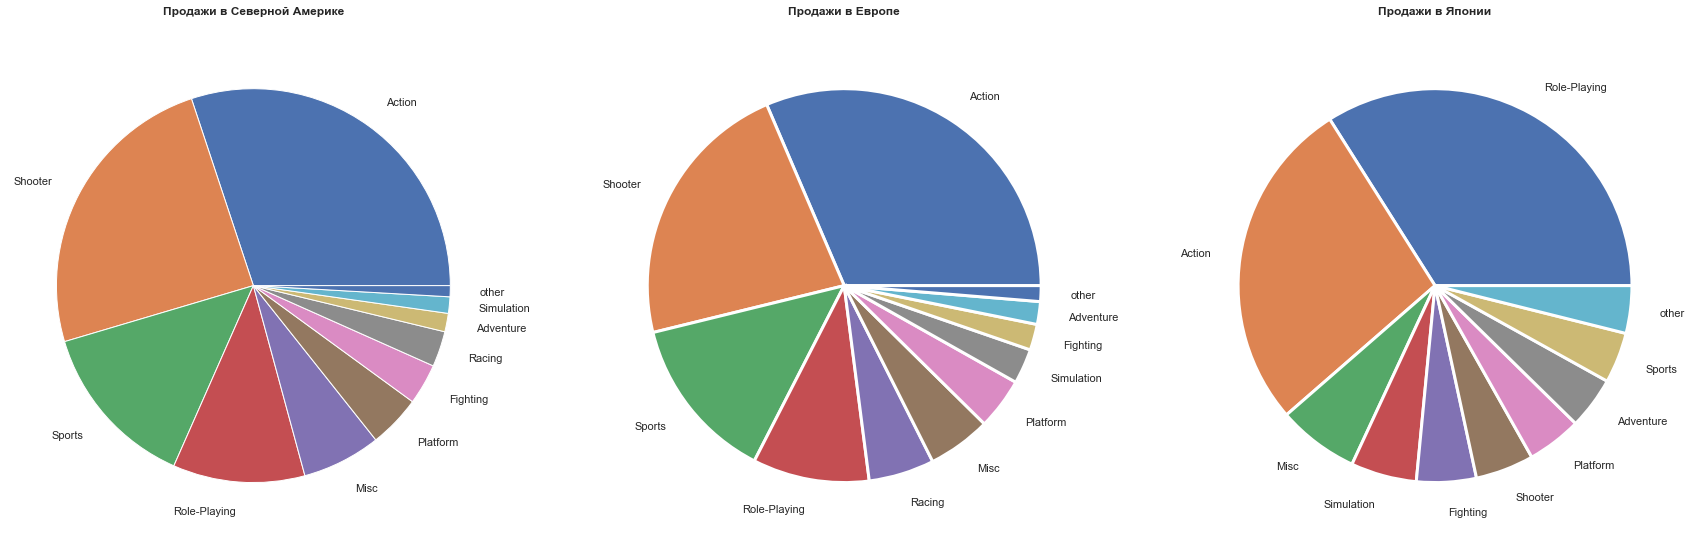

In [70]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 32))
ax1.pie(
    genre_na_actualperiod['na_sales'], 
    labels=genre_na_actualperiod['genre'], labeldistance=1.15, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }
)
ax1.set_title('Продажи в Северной Америке', fontweight='bold', pad=25)

ax2.pie(
    genre_eu_actualperiod['eu_sales'], 
    labels=genre_eu_actualperiod['genre'], labeldistance=1.15, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }
)
ax2.set_title('Продажи в Европе', fontweight='bold', pad=25)

ax3.pie(
    genre_jp_actualperiod['jp_sales'], 
    labels=genre_jp_actualperiod['genre'], labeldistance=1.15, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }
)
ax3.set_title('Продажи в Японии', fontweight='bold', pad=25)

plt.show()




Рынки Америки и Европы похожи между собой: первые четыре популярных жанра повторяются - Action, Shooter, Sports, Role-Playing; имеются незначительные различия в предпочтениях далее. 
На локальном рынке Японии наблюдаем координальное отличие от мирового тренда. Наибольшую популярность имеет жанр Role-Playing, который смещает жанр Action на второе место. Остальные жанры (в том числе популярные в Европе и Америке Shooter и Sports) делят оставшиеся места примерно поровну.  

**Исследуем распределение по жанрам в Северной Америке за актуальный период:** 

In [71]:
genre_sales_region = data_actualperiod.groupby('genre').sum().reset_index().sort_values("sum_sales", ascending=False) #сгруппируем таблицу по для построения графика

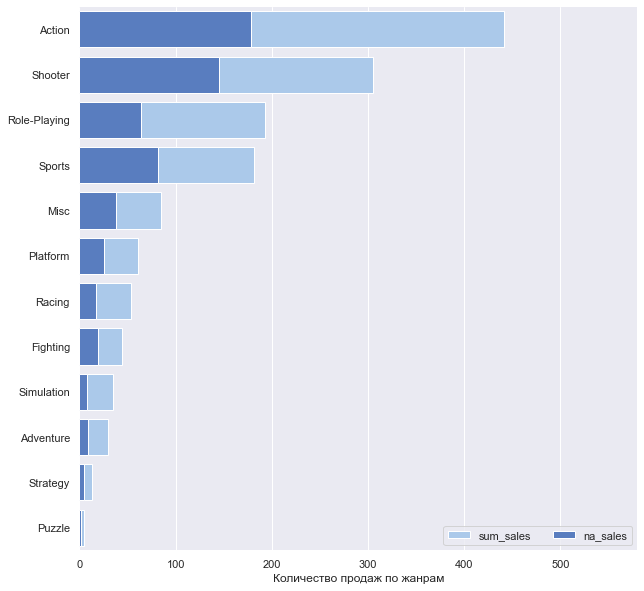

In [72]:
# создадим фигуру
f, ax = plt.subplots(figsize=(10, 10))

# нанесем суммарные продажи
sns.set_color_codes("pastel")
sns.barplot(x="sum_sales", y="genre", data=genre_sales_region,
            label="sum_sales", color="b")

# нанесем продажи NA
sns.set_color_codes("muted")
sns.barplot(x="na_sales", y="genre", data=genre_sales_region,
            label="na_sales", color="b")

# добавим легенду и информацию по осям
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 580), ylabel="",
       xlabel="Количество продаж по жанрам")
sns.despine(left=True, bottom=True)

Первая пятерка популярных жанров в Северной америке совпадает с общемировой. Отличие - жанр Sports сместил с третьего места жанр Role-Playing.

**Исследуем распределение по жанрам в Европе за актуальный период:** 

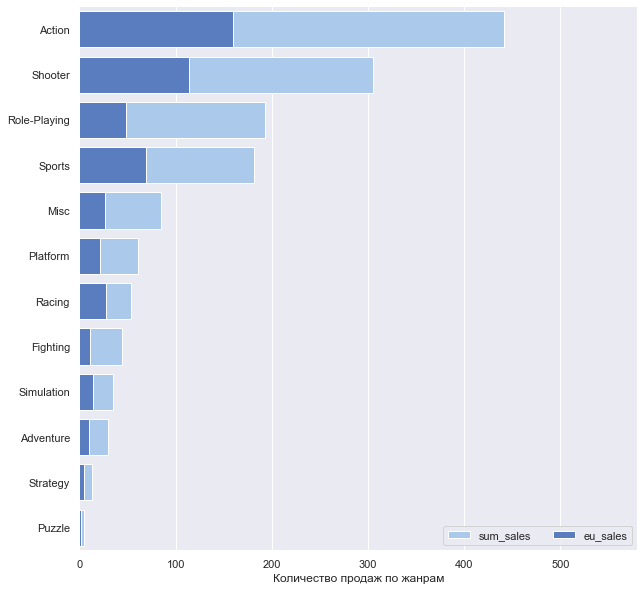

In [73]:
# создадим фигуру
f, ax = plt.subplots(figsize=(10, 10))

# нанесем суммарные продажи
sns.set_color_codes("pastel")
sns.barplot(x="sum_sales", y="genre", data=genre_sales_region,
            label="sum_sales", color="b")

# нанесем продажи EU
sns.set_color_codes("muted")
sns.barplot(x="eu_sales", y="genre", data=genre_sales_region,
            label="eu_sales", color="b")

# добавим легенду и информацию по осям
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 580), ylabel="",
       xlabel="Количество продаж по жанрам")
sns.despine(left=True, bottom=True)

Первая пятерка популярных жанров в Еврове совпадает с общемировой. Отличие - жанр Sports сместил с третьего места жанр Role-Playing. Рынок Европы по вкусовым предпочтения похож на рынок Северной Америки.

**Исследуем распределение по жанрам в Японии за актуальный период:** 

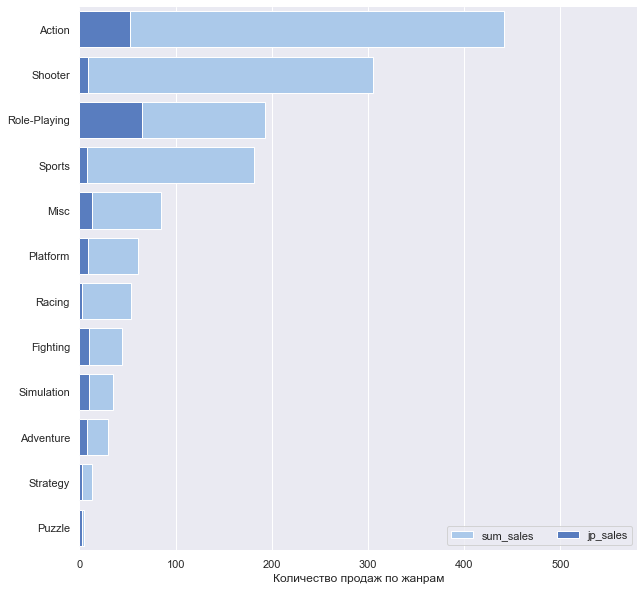

In [74]:
# создадим фигуру
f, ax = plt.subplots(figsize=(10, 10))

# нанесем суммарные продажи
sns.set_color_codes("pastel")
sns.barplot(x="sum_sales", y="genre", data=genre_sales_region,
            label="sum_sales", color="b")

# нанесем продажи JP
sns.set_color_codes("muted")
sns.barplot(x="jp_sales", y="genre", data=genre_sales_region,
            label="jp_sales", color="b")

# добавим легенду и информацию по осям
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 580), ylabel="",
       xlabel="Количество продаж по жанрам")
sns.despine(left=True, bottom=True)

На локальном рынке Японии наблюдаем координальное отличие от мирового тренда. Наибольшую популярность имеет жанр Role-Playing, который смещает жанр Action на второе место. У остальных жанров на наблюдаем сильное отставание от лидеров. 


Популярнось жанра Role-Playing в Японии даже вывела его на третье место в мировом распределении, хотя в Америке и Европе на третьем месте жанр Sport. 

**Проверим гипотезу, что рынок компьютерных игр диномично меняется, и проверим популярнось жанров за 2015 и 2016 годы.**

In [75]:
genre_sales_region2015 = data_actualperiod[data_actualperiod['year_of_release']>2014].groupby('genre').sum().reset_index().sort_values("sum_sales", ascending=False) #сгруппируем таблицу по для построения графика

**Исследуем распределение по жанрам в Северной Америке за 2015 и 2016 годы:** 

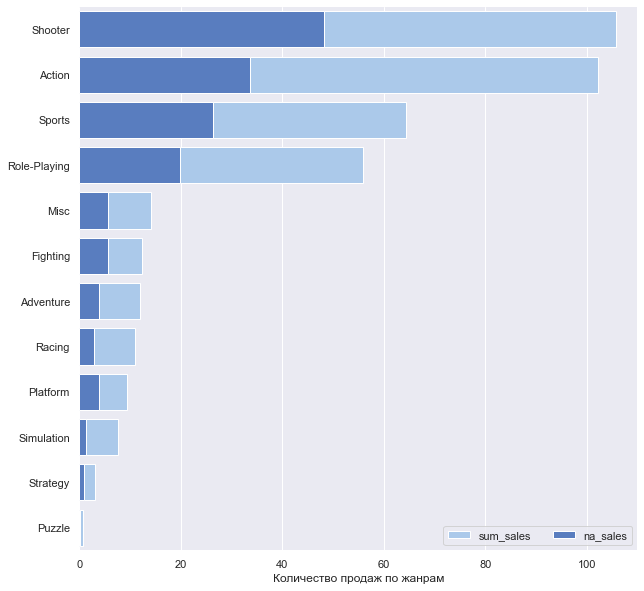

In [76]:
# создадим фигуру
f, ax = plt.subplots(figsize=(10, 10))

# нанесем суммарные продажи
sns.set_color_codes("pastel")
sns.barplot(x="sum_sales", y="genre", data=genre_sales_region2015,
            label="sum_sales", color="b")

# нанесем продажи NA
sns.set_color_codes("muted")
sns.barplot(x="na_sales", y="genre", data=genre_sales_region2015,
            label="na_sales", color="b")

# добавим легенду и информацию по осям
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 110), ylabel="",
       xlabel="Количество продаж по жанрам")
sns.despine(left=True, bottom=True)

Первая пятерка сохранилась, однако жанр Shooter сместил жанр Action с первого места. И жанр Sport наконец вышел на третье место в мировом распределении, скорее всего популярность жанра Role-Playng в Японии снижается.

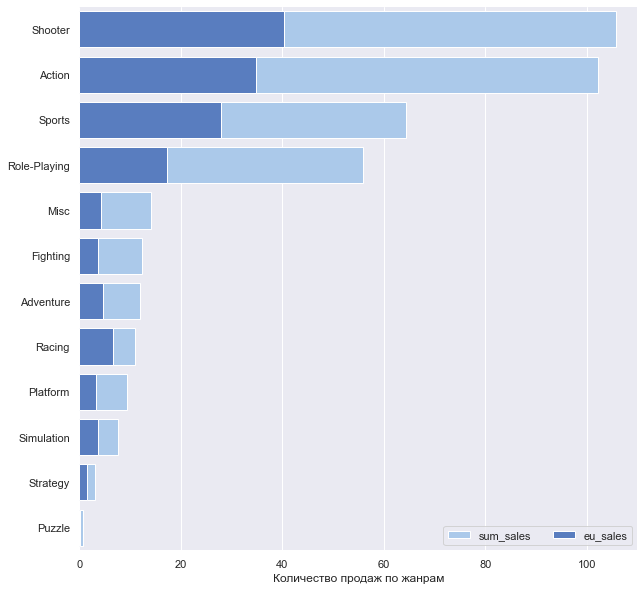

In [77]:
# создадим фигуру
f, ax = plt.subplots(figsize=(10, 10))

# нанесем суммарные продажи
sns.set_color_codes("pastel")
sns.barplot(x="sum_sales", y="genre", data=genre_sales_region2015,
            label="sum_sales", color="b")

# нанесем продажи EU
sns.set_color_codes("muted")
sns.barplot(x="eu_sales", y="genre", data=genre_sales_region2015,
            label="eu_sales", color="b")

# добавим легенду и информацию по осям
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 110), ylabel="",
       xlabel="Количество продаж по жанрам")
sns.despine(left=True, bottom=True)

Картина в Европе повторяет американкую. Первая пятерка сохранилась, жанр Shooter сместил жанр Action с первого места. И жанр Sport вышел на третье место в мировом распределении.

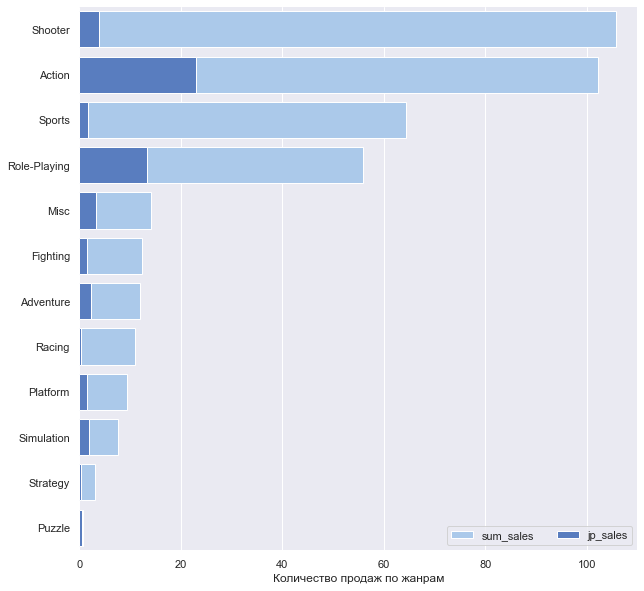

In [78]:
# создадим фигуру
f, ax = plt.subplots(figsize=(10, 10))

# нанесем суммарные продажи
sns.set_color_codes("pastel")
sns.barplot(x="sum_sales", y="genre", data=genre_sales_region2015,
            label="sum_sales", color="b")

# нанесем продажи JP
sns.set_color_codes("muted")
sns.barplot(x="jp_sales", y="genre", data=genre_sales_region2015,
            label="jp_sales", color="b")

# добавим легенду и информацию по осям
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 110), ylabel="",
       xlabel="Количество продаж по жанрам")
sns.despine(left=True, bottom=True)

Гипотеза подтвердилась: в последние годы в Японии популярность жанра Role-Playing снижается. На первом месте уже Action. Однако общая тенденция сохраняется - жанры Action и Role-Playing являются абсолютными лидерами.

**Гипотеза, что рынок компьютерных игр динамично меняется подтвердилась отчасти. За период 2011-2016 годы и 2015-2016 годы наиболее популярные жанры одни и теже - Shooter, Action, Sports, Role-Playing, Misc. Разница в деталях - в последние годы жанр Shooter сместил с первого места жанр Action; в Японии популярность жанра Role-Playing снижается, что позволило жанру Sports выйти на третье место в мировом распределении.**

**Исследуем, влияет ли рейтинг ESRB на продажи в отдельном регионе за актуальный период.**

In [79]:
data_actualperiod['rating'].value_counts()

RP      1275
M        498
T        412
E        395
E10+     306
Name: rating, dtype: int64

Дадим определения рейтингов присутствующих в нашем наборе данных:
- 'M' - («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет.
- 'RP' - («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга.
- 'E' - («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет.
- 'E10+' - («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови.
- 'T' - («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет.
- 'EC' - («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими.

Имеем одну игру с рейтингом 'EC' «Early childhood», на наше исследование оно не повляет. Присоединим это значение к разделу «Everyone».

In [80]:
data_actualperiod['rating'] = data_actualperiod['rating'].replace('EC', 'E')



**Построим круговые диаграммы по регионам:**

In [81]:
rating_sales_region = data_actualperiod.groupby('rating').sum().reset_index().sort_values("sum_sales", ascending=False) #сгруппируем таблицу по для построения графика

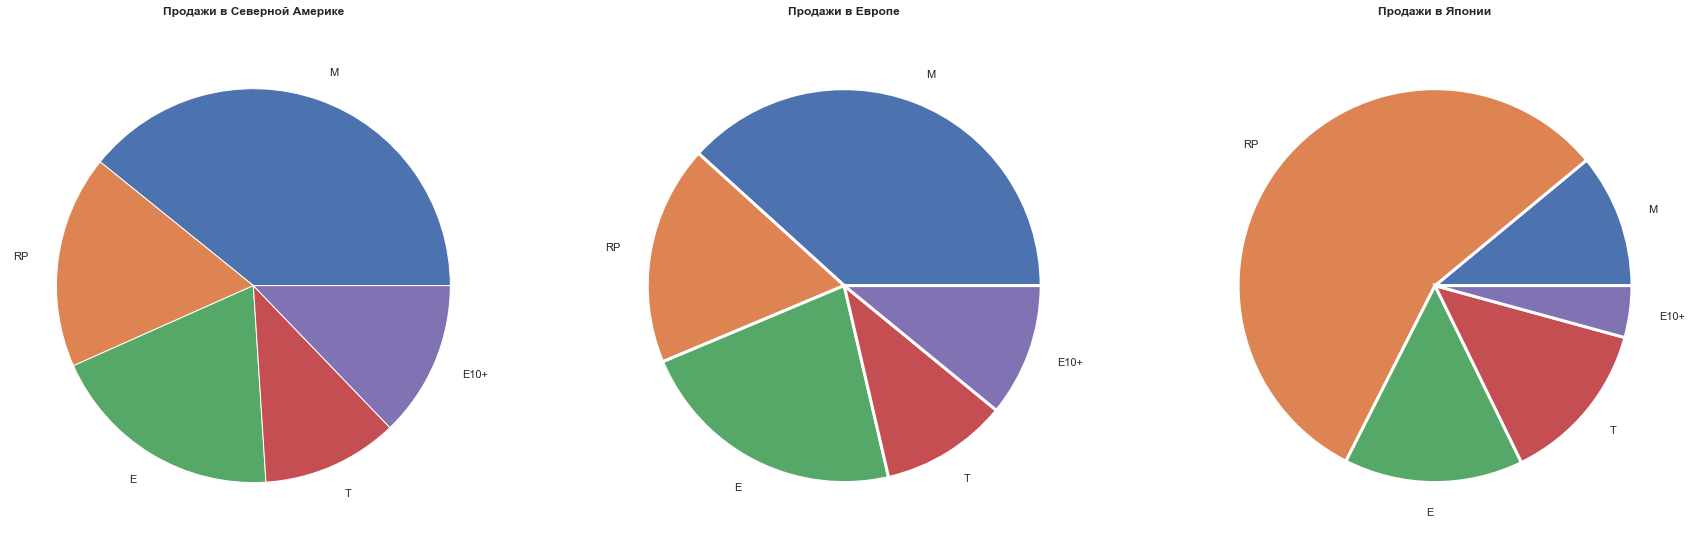

In [82]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 32))
ax1.pie(
    rating_sales_region['na_sales'], 
    labels=rating_sales_region['rating'], labeldistance=1.15, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }
)
ax1.set_title('Продажи в Северной Америке', fontweight='bold', pad=25)

ax2.pie(
    rating_sales_region['eu_sales'], 
    labels=rating_sales_region['rating'], labeldistance=1.15, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }
)
ax2.set_title('Продажи в Европе', fontweight='bold', pad=25)

ax3.pie(
    rating_sales_region['jp_sales'], 
    labels=rating_sales_region['rating'], labeldistance=1.15, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }
)
ax3.set_title('Продажи в Японии', fontweight='bold', pad=25)

plt.show()



Рынки Европы и Северной Америки идентичны: популярны игры «Для взрослых», остальные рейтинги имеют похожие продажи.
В Японии набирают большие продажи игры без рейтинга. Возможно в Японии применяется другая шкала оценки игр, либо японцы не образают внимания на рейтинг игры.

**Исследуем распределение продаж по рейтингу ESRB в Северной Америке за актуальный период:**

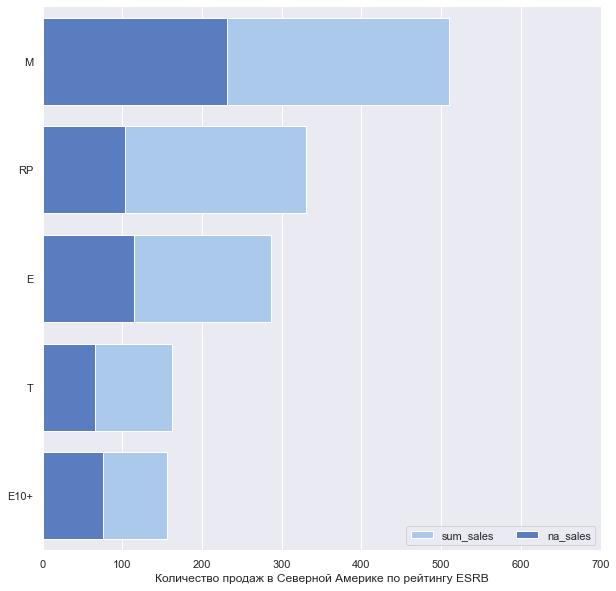

In [83]:
# создадим фигуру
f, ax = plt.subplots(figsize=(10, 10))

# нанесем суммарные продажи
sns.set_color_codes("pastel")
sns.barplot(x="sum_sales", y="rating", data=rating_sales_region,
            label="sum_sales", color="b")

# нанесем продажи NA
sns.set_color_codes("muted")
sns.barplot(x="na_sales", y="rating", data=rating_sales_region,
            label="na_sales", color="b")

# добавим легенду и информацию по осям
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 700), ylabel="",
       xlabel="Количество продаж в Северной Америке по рейтингу ESRB")
sns.despine(left=True, bottom=True)

Распределение продаж по рейтингу в следующем порядке: популярны игры «Для взрослых», на втором месте «Для всех», рейтинги «Для всех от 10 лет и старше» и «Подросткам» и "Без рейтинга" имеют похожие продажи. Наблюдаем, что посравнению с мировым распределением игры без рейтинга пользуются меньшей популярностью. 

**Исследуем распределение продаж по рейтингу ESRB в Европе за актуальный период:**

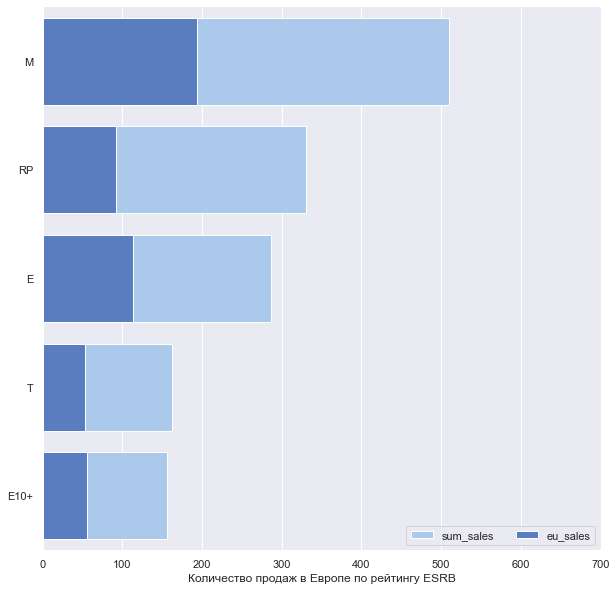

In [84]:
# создадим фигуру
f, ax = plt.subplots(figsize=(10, 10))

# нанесем суммарные продажи
sns.set_color_codes("pastel")
sns.barplot(x="sum_sales", y="rating", data=rating_sales_region,
            label="sum_sales", color="b")

# нанесем продажи EU
sns.set_color_codes("muted")
sns.barplot(x="eu_sales", y="rating", data=rating_sales_region,
            label="eu_sales", color="b")

# добавим легенду и информацию по осям
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 700), ylabel="",
       xlabel="Количество продаж в Европе по рейтингу ESRB")
sns.despine(left=True, bottom=True)

Картина повторяет американскую. Распределение продаж по рейтингу в следующем порядке: популярны игры «Для взрослых», на втором месте «Для всех», рейтинги «Для всех от 10 лет и старше» и «Подросткам» и "Без рейтинга" имеют похожие продажи. Наблюдаем, что посравнению с мировым распределением игры без рейтинга пользуются меньшей популярностью. 

**Исследуем распределение продаж по рейтингу ESRB в Японии за актуальный период:**

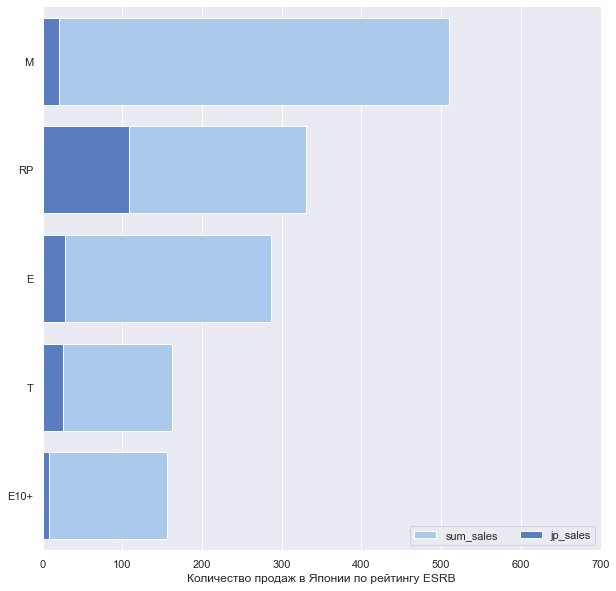

In [85]:
# создадим фигуру
f, ax = plt.subplots(figsize=(10, 10))

# нанесем суммарные продажи
sns.set_color_codes("pastel")
sns.barplot(x="sum_sales", y="rating", data=rating_sales_region,
            label="sum_sales", color="b")

# нанесем продажи JP
sns.set_color_codes("muted")
sns.barplot(x="jp_sales", y="rating", data=rating_sales_region,
            label="jp_sales", color="b")

# добавим легенду и информацию по осям
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 700), ylabel="",
       xlabel="Количество продаж в Японии по рейтингу ESRB")
sns.despine(left=True, bottom=True)

В Японии набирают большие продажи игры без рейтинга (отсюда второе место у игр без рейтинга в мировом распределении). Возможно в Японии применяется другая шкала оценки игр.

**Проверим данные за последние два года.**

**Исследуем распределение продаж по рейтингу ESRB в Северной Америке за последние два года:**

In [86]:
rating_sales_region2015 = data_actualperiod[data_actualperiod['year_of_release']>2014].groupby('rating').sum().reset_index().sort_values("sum_sales", ascending=False) #сгруппируем таблицу по для построения графика

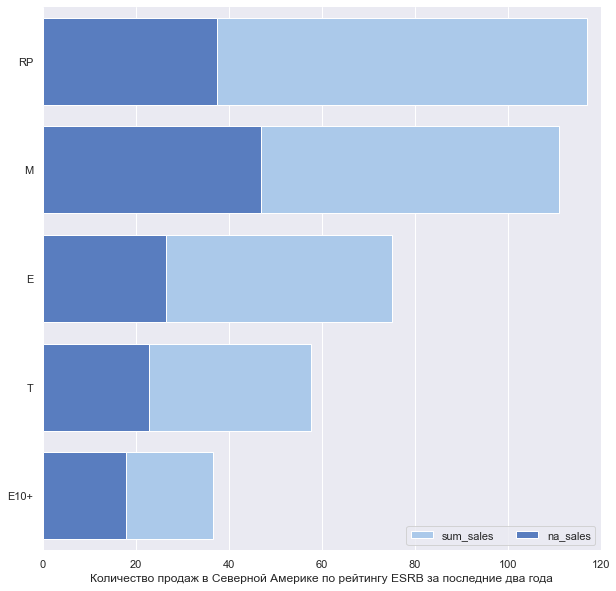

In [87]:
# создадим фигуру
f, ax = plt.subplots(figsize=(10, 10))

# нанесем суммарные продажи
sns.set_color_codes("pastel")
sns.barplot(x="sum_sales", y="rating", data=rating_sales_region2015,
            label="sum_sales", color="b")

# нанесем продажи NA
sns.set_color_codes("muted")
sns.barplot(x="na_sales", y="rating", data=rating_sales_region2015,
            label="na_sales", color="b")

# добавим легенду и информацию по осям
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 120), ylabel="",
       xlabel="Количество продаж в Северной Америке по рейтингу ESRB за последние два года")
sns.despine(left=True, bottom=True)

Распределение по последним двум годам, аналогично распределению за актуальный период. Увеличено количество игр без рейтинга. Связано с тем, что игры недвно вышли и ожидают оценку.

**Исследуем распределение продаж по рейтингу ESRB в Европе за последние два года:**

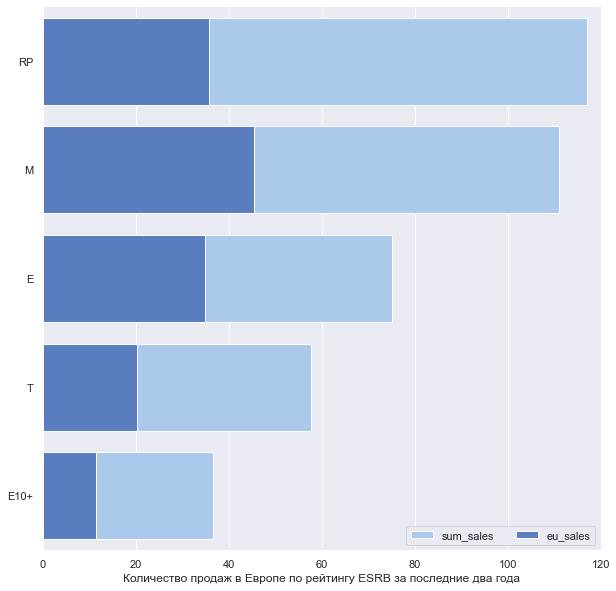

In [88]:
# создадим фигуру
f, ax = plt.subplots(figsize=(10, 10))

# нанесем суммарные продажи
sns.set_color_codes("pastel")
sns.barplot(x="sum_sales", y="rating", data=rating_sales_region2015,
            label="sum_sales", color="b")

# нанесем продажи EU
sns.set_color_codes("muted")
sns.barplot(x="eu_sales", y="rating", data=rating_sales_region2015,
            label="eu_sales", color="b")

# добавим легенду и информацию по осям
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 120), ylabel="",
       xlabel="Количество продаж в Европе по рейтингу ESRB за последние два года")
sns.despine(left=True, bottom=True)

Распределение по последним двум годам, аналогично распределению за актуальный период. Увеличено количество игр без рейтинга. Связано с тем, что игры недвно вышли и ожидают оценку.

**Исследуем распределение продаж по рейтингу ESRB в Японии за последние два года:**

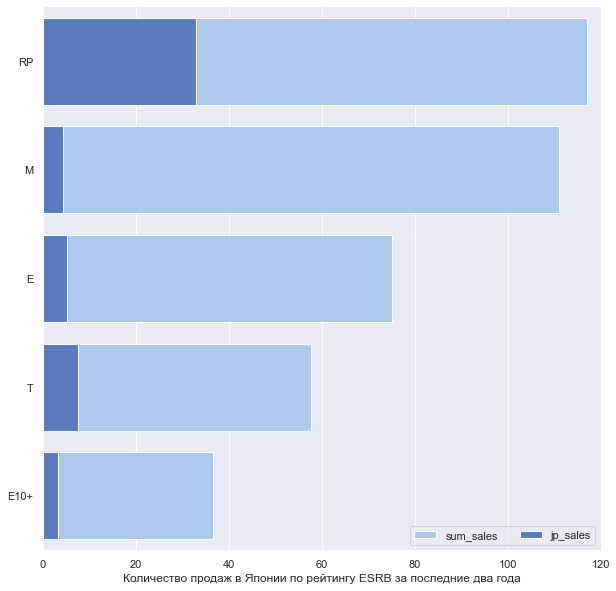

In [89]:
# создадим фигуру
f, ax = plt.subplots(figsize=(10, 10))

# нанесем суммарные продажи
sns.set_color_codes("pastel")
sns.barplot(x="sum_sales", y="rating", data=rating_sales_region2015,
            label="sum_sales", color="b")

# нанесем продажи JP
sns.set_color_codes("muted")
sns.barplot(x="jp_sales", y="rating", data=rating_sales_region2015,
            label="jp_sales", color="b")

# добавим легенду и информацию по осям
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 120), ylabel="",
       xlabel="Количество продаж в Японии по рейтингу ESRB за последние два года")
sns.despine(left=True, bottom=True)

Распределение по последним двум годам, аналогично распределению за актуальный период.

### Проверка гипотез.

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**

```
H_0: Пользовательские рейтинги (user_score) платформы Xbox One = пользовательские рейтинги (user_score) платформы PC`
H_a: Пользовательские рейтинги (user_score) платформы Xbox One ≠ пользовательские рейтинги (user_score) платформы PC`
Критический уровень статистической значимости зададим 5%
```

In [90]:
hip_data = data_actualperiod.dropna(subset=['user_score'])

In [91]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(
    hip_data[hip_data['platform']=='XOne']['user_score'],
    hip_data[hip_data['platform']=='PC']['user_score'], 
    equal_var=False)
# alpha = задайте значение уровня значимости
alpha = 0.05
# вывод значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


Это слишком большая вероятность, чтобы делать вывод о значимом различии между пользовательскими рейтингами двух платформ.

**Средние пользовательские рейтинги жанров Action и Sports разные.**

```
H_0: Пользовательские рейтинги (user_score) жанра Action = пользовательские рейтинги (user_score) жанра Sports`
H_a: Пользовательские рейтинги (user_score) жанра Action ≠ пользовательские рейтинги (user_score) жанра SportsC`
Критический уровень статистической значимости зададим 5%
```

In [92]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(
    hip_data[hip_data['genre']=='Action']['user_score'],
    hip_data[hip_data['genre']=='Sports']['user_score'], 
    equal_var=False)
# alpha = задайте значение уровня значимости
alpha = 0.05
# вывод значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


4.24307776572644e-20
Отвергаем нулевую гипотезу


Вероятность мала, различия достаточно значимые между пользовательскими рейтингами двух жанров.


    
### Общий вывод



**Выход на мировой рынок:**

Если мы планируем выйти на мировой рынок с игрой в 2017 году, нам необходимо выбрать платформы PS4, XOne, 3DS, PC; жанр можем выбрать Action либо Shooter; по содержанию игра может быть и "для взрослых" и "для всех".

**Выход на рынок Северной Америки:**

В таком случае игра должна выходить на платформах PS4 и XOne; в жанре Shooter, Action либо Sports; по содержанию игра может быть и "для взрослых" и "для всех".

**Выход на рынок Европы:**

Игра ориентирована на рынок Европы, тогда предпочтительные платформы - PS4 и PC; в жанре Shooter, Action либо Sports; по содержанию игра может быть и "для взрослых" и "для всех".

**Выход на рынок Японии:**

Если мы планируем выйти на рынок Японии, тогда платформы - PS4 и 3DS; жанры - Action, Role-Playing; по возрастному ограничению определили, что японцы не обращают внимание на рейтинг ESRB.

**Проверка гипотез:**

Мы не смогли отвергнуть гипотезу "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые". Значимого различия между пользовательскими рейтингами игр двух платформ скорее всего нет. Данные платформы довольно популярны на похожих между собой рынках Северной Америки и Европы. Многие игры, представлены и на Xbox One и PC, соответственно и средние пользователькие оценки похожи.

И мы не смогли отвергнуть гипотезу "Средние пользовательские рейтинги жанров Action и Sports разные". Вероятность получить равенство средних рейтингов этих жанров слишком мала. Во первых это принципиально разные жанры. Во вторых жанр Sports хорошо представлен только в Европе и Северной Америке (похожие рынки), а жанр Action во всех регионах, особенно набирает популярность в последние годы в Японии, а как говорится "восток дело тонкое". 

**Общие наблюдения:**

При разработке игры обратить внимание на критерии оценки игр критиками, так как наблюдается средняя (на некоторых платформах ближе к слабой) зависимость между оценкой критика и успехом игры; оценка пользователей не влияет на успех (на некоторых платформах наблюдали небольшую корреляцию, однако она оставалась в слабых значениях), скорее всего критерии по которым пользователи оценивают игру слишком размыты.

Рынок комьютерных игр динамично меняется, однако люди достаточно консервативны. Если нам надо выбрать одну топовую платформу, один жанр, один регион, то необходимо исследовать самые "свежие" данные - 1,2 года. Если нам необходимо показать некоторое количество топовых платформ, жанров и проецируемся на весь мир, то данных лучше взять больше.

Проведя исследование заметили снижение популярности компьютерных игр в последнее время. Однако в наборе данных не представлены платформы с играми для смартфонов. Скорее всего интерес к компьторным играм не падает, а долю рынка забирают данные платформы.
